# Аналитика расхода топлива для грузового автомобиля с прицепом

Загружаем csv файл в pandas dataframe с указанием типов данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = 'task_fuel.csv'

data = pd.read_csv(path, dtype={"Unnamed: 0": np.int32, "Unnamed: 0.1": np.int32, 
 "Time": str, "Latitude": np.float32, "Longitude": np.float32,
 "Altitude": np.float32, "Speed (km/h)": np.int32, "Battery (mV)": np.int32,
 "Acc. Pedal 1 low idle switch": str, "Acc. Pedal Kickdown Switch": str,
 "Road speed limit status": str, "Acc. Pedal Position (%)": np.float32,
 "Percent Load at current speed (%)": np.float32, "Remote Acc. Pedal position (%)": str,
 "Engine torque mode": str, "Driver's demand engine - percent torque (%)": np.float32,
 "Actual engine - percent torque (%)": np.float32, "Engine speed (rpm)": np.float32,
 "Source address of controlling device for engine control": np.float32,
 "Engine starter mode": str, "Engine demand, percent torque (%)": np.float32,
 "Tachograph output shaft speed (rpm)": str,
 "Tachograph vehicle speed (km/h)": np.float32, "ASR engine control active": str,
 "ASR brake control active": str, "Anti-lock braking (ABS) active": str,
 "EBS brake switch": str, "Brake pedal position (%)": str, "ABS off-road switch": str,
 "ASR off-road switch": str, 'ASR "Hill Holder" switch': str,
 "Traction control override switch": str, "Accelerator interlock switch": str,
 "Engine derate switch": str, "Auxilary engine shutdown switch": str,
 "Remote accelerator enable switch": str, "Engine retarder selection": str,
 "ABS fully operational": str, "EBS red warning signal": str,
 "ABS/EBS amber warning signal": str, "ATC/ASR information signal": str,
 "Source address of contolling device for brake control": str,
 "Trailer ABS status": str, "Tractor mounted trailer ABS warning signal": str,
 "Trip Distance (km)": np.float32, "Total Vehicle Distance (km)": np.float32, "Trip Fuel (L)": np.float32,
 "Total Fuel Used (L)": np.float32, "Engine coolant temperature (C)": np.float32,
 "Fuel temperature (C)": np.float32, "Engine oil temperature 1 (C)": np.float32,
 "Turbo oil temperature (C)": np.float32, "Engine intercooler temperature (C)": np.float32,
 "Engine intercooler thermostat opening (%)": np.float32,
 "Fuel Delivery Pressure (kPa)": np.float32,
 "Extended Crankcase Blow-by Pressure (kPa)": np.float32, "Engine Oil Level (%)": np.float32,
 "Engine Oil Pressure (kPa)": np.float32, "Crankcase Pressure (kPa)": np.float32,
 "Coolant Pressure (kPa)": np.float32, "Coolant Level (%)": np.float32, "Washer Fluid Level (%)": np.float32,
 "Fuel Level (%)": np.float32, "Fuel Filter Differential Pressure (kPa)": np.float32,
 "Engine Oil Filter Differential Pressure (kPa)": np.float32,
 "Cargo Ambient Temperature (C)": np.float32, "Axle Location": str, "Axle Weight (kg)": np.float32,
 "Trailer Weight (kg)": str}, parse_dates=['Time'])

np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.3f}'.format})
pd.options.display.float_format = '{:,.2f}'.format

\
Оценим поступившие данные

In [2]:
pd.options.display.max_columns = 999
data.head()

,Unnamed: 0.1,Unnamed: 0,Time,Latitude,Longitude,Altitude,Speed (km/h),Battery (mV),Acc. Pedal 1 low idle switch,Acc. Pedal Kickdown Switch,Road speed limit status,Acc. Pedal Position (%),Percent Load at current speed (%),Remote Acc. Pedal position (%),Engine torque mode,Driver's demand engine - percent torque (%),Actual engine - percent torque (%),Engine speed (rpm),Source address of controlling device for engine control,Engine starter mode,"Engine demand, percent torque (%)",Tachograph output shaft speed (rpm),Tachograph vehicle speed (km/h),ASR engine control active,ASR brake control active,Anti-lock braking (ABS) active,EBS brake switch,Brake pedal position (%),ABS off-road switch,ASR off-road switch,"ASR ""Hill Holder"" switch",Traction control override switch,Accelerator interlock switch,Engine derate switch,Auxilary engine shutdown switch,Remote accelerator enable switch,Engine retarder selection,ABS fully operational,EBS red warning signal,ABS/EBS amber warning signal,ATC/ASR information signal,Source address of contolling device for brake control,Trailer ABS status,Tractor mounted trailer ABS warning signal,Trip Distance (km),Total Vehicle Distance (km),Trip Fuel (L),Total Fuel Used (L),Engine coolant temperature (C),Fuel temperature (C),Engine oil temperature 1 (C),Turbo oil temperature (C),Engine intercooler temperature (C),Engine intercooler thermostat opening (%),Fuel Delivery Pressure (kPa),Extended Crankcase Blow-by Pressure (kPa),Engine Oil Level (%),Engine Oil Pressure (kPa),Crankcase Pressure (kPa),Coolant Pressure (kPa),Coolant Level (%),Washer Fluid Level (%),Fuel Level (%),Fuel Filter Differential Pressure (kPa),Engine Oil Filter Differential Pressure (kPa),Cargo Ambient Temperature (C),Axle Location,Axle Weight (kg),Trailer Weight (kg)
0,0,0,2018-03-01 04:27:11,55.85,48.57,90.00,6,28004,Accelerator pedal 1 not in low idle condition,Kickdown passive,Not Active,39.60,7.00,NaN,Transmission control,26.00,2.00,"1,509.50",3.00,NaN,26.00,NaN,NaN,ASR engine control passive but installed,ASR brake control passive but installed,ABS passive but installed,Brake pedal is not being pressed,0.0,NaN,ASR off-road switch passive,"ASR ""Hill Holder"" switch passive",Not available or not installed,NaN,NaN,NaN,NaN,NaN,Fully Operational,off,off,off,NaN,Trailer ABS Status Information Not Available o...,off,293.62,"122,370.62",103.00,"38,629.00",42.00,7.00,45.00,NaN,NaN,NaN,NaN,NaN,46.00,496.00,NaN,NaN,100.00,NaN,25.20,NaN,NaN,NaN,0x1f,"6,222.50",NaN
1,1,1,2018-03-01 04:27:12,55.85,48.57,91.00,7,28015,Accelerator pedal 1 not in low idle condition,Kickdown passive,Not Active,42.40,9.00,NaN,Transmission control,37.00,8.00,"1,028.62",3.00,NaN,36.00,NaN,NaN,ASR engine control passive but installed,ASR brake control passive but installed,ABS passive but installed,Brake pedal is not being pressed,0.0,NaN,ASR off-road switch passive,"ASR ""Hill Holder"" switch passive",Not available or not installed,NaN,NaN,NaN,NaN,NaN,Fully Operational,off,off,off,NaN,Trailer ABS Status Information Not Available o...,off,293.62,"122,370.62",103.00,"38,629.00",42.00,7.00,45.00,NaN,NaN,NaN,NaN,NaN,46.00,496.00,NaN,NaN,100.00,NaN,24.00,NaN,NaN,NaN,0x1f,"6,162.00",NaN
2,2,2,2018-03-01 04:27:13,55.85,48.57,91.00,7,27993,Accelerator pedal 1 not in low idle condition,Kickdown passive,Not Active,45.20,46.00,NaN,Accelerator pedal/operator selection,38.00,38.00,"1,123.50",0.00,NaN,38.00,NaN,NaN,ASR engine control passive but installed,ASR brake control passive but installed,ABS passive but installed,Brake pedal is not being pressed,0.0,NaN,ASR off-road switch passive,"ASR ""Hill Holder"" switch passive",Not available or not installed,NaN,NaN,NaN,NaN,NaN,Fully Operational,off,off,off,NaN,Trailer ABS Status Information Not Available o...,off,293.62,"122,370.62",103.00,"38,629.00",42.00,7.00,45.00,NaN,NaN,NaN,NaN,NaN,46.00,472.00,NaN,NaN,100.00,NaN,22.80,NaN,NaN,NaN,0x1f,"6,244.50",NaN
3,3,3,2018-03-01 04:27:14,55.85,48.57,92.00,7,28019,Accelerator pedal 1 not in 

In [3]:
data.describe(include='all',datetime_is_numeric=True)

,Unnamed: 0.1,Unnamed: 0,Time,Latitude,Longitude,Altitude,Speed (km/h),Battery (mV),Acc. Pedal 1 low idle switch,Acc. Pedal Kickdown Switch,Road speed limit status,Acc. Pedal Position (%),Percent Load at current speed (%),Remote Acc. Pedal position (%),Engine torque mode,Driver's demand engine - percent torque (%),Actual engine - percent torque (%),Engine speed (rpm),Source address of controlling device for engine control,Engine starter mode,"Engine demand, percent torque (%)",Tachograph output shaft speed (rpm),Tachograph vehicle speed (km/h),ASR engine control active,ASR brake control active,Anti-lock braking (ABS) active,EBS brake switch,Brake pedal position (%),ABS off-road switch,ASR off-road switch,"ASR ""Hill Holder"" switch",Traction control override switch,Accelerator interlock switch,Engine derate switch,Auxilary engine shutdown switch,Remote accelerator enable switch,Engine retarder selection,ABS fully operational,EBS red warning signal,ABS/EBS amber warning signal,ATC/ASR information signal,Source address of contolling device for brake control,Trailer ABS status,Tractor mounted trailer ABS warning signal,Trip Distance (km),Total Vehicle Distance (km),Trip Fuel (L),Total Fuel Used (L),Engine coolant temperature (C),Fuel temperature (C),Engine oil temperature 1 (C),Turbo oil temperature (C),Engine intercooler temperature (C),Engine intercooler thermostat opening (%),Fuel Delivery Pressure (kPa),Extended Crankcase Blow-by Pressure (kPa),Engine Oil Level (%),Engine Oil Pressure (kPa),Crankcase Pressure (kPa),Coolant Pressure (kPa),Coolant Level (%),Washer Fluid Level (%),Fuel Level (%),Fuel Filter Differential Pressure (kPa),Engine Oil Filter Differential Pressure (kPa),Cargo Ambient Temperature (C),Axle Location,Axle Weight (kg),Trailer Weight (kg)
count,"3,325,092.00","3,325,092.00",3325092,"3,325,092.00","3,325,092.00","3,325,092.00","3,325,092.00","3,325,092.00",3197980,3197980,3197980,"3,197,980.00","3,197,980.00",24,3197982,"3,197,959.00","3,197,959.00","3,197,982.00","3,197,982.00",23,"3,197,982.00",3049973,"3,049,973.00",3189353,3188649,3197358,3197357,3197357,24,3192797,3192797,3325092,24,24,24,24,24,3197358,3325092,3325092,3325092,112251,3325092,3325092,"3,231,526.00","3,231,526.00","3,229,694.00","3,229,694.00","3,193,482.00","3,196,567.00","3,193,482.00",10.00,10.00,10.00,7.00,7.00,"3,194,342.00","3,194,342.00",7.00,7.00,"3,197,900.00",7.00,"3,196,433.00",7.00,7.00,7.00,3325092,"3,196,238.00",26
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,1,9,NaN,NaN,NaN,NaN,1,NaN,2166,NaN,2,2,2,2,203,1,2,2,2,1,1,1,1,1,2,3,3,3,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accelerator pedal 1 in low idle condition,Kickdown passive,Not Active,NaN,NaN,0.0,Cruise control,NaN,NaN,NaN,NaN,start not requested,NaN,0.0,NaN,ASR engine control passive but installed,ASR brake control passive but installed,ABS passive but installed,Brake pedal is not being pressed,0.0,ABS off-road switch passive,ASR off-road switch passive,"ASR ""Hill Holder"" switch passive",Not available or not installed,off,off,off,off,0.0,Fully Operational,off,off,off,11.0,Trailer ABS Status Information Not Available o...,off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x1f,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1844135,3194164,3098097,NaN,NaN,24,1121868,NaN,NaN,NaN,NaN,23,NaN,31449,NaN,3182461,3186356,3197263,3052203,3087216,24,3192621,3172480,3325068,24,24,24,24,24,3189375,3189807,3192300,3189863,112227,3325068,3159457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3197665,NaN,26
mean,"1,662,545.50","1,662,545.50",2018-12-16 03:15:38.009097216,55.22,50.58,151.31,62.99,"28,045.46",NaN,NaN,NaN,25.61,38.69,NaN,NaN,36.03,34.45,"1,257.24",0.16,NaN,35.76,NaN,66.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,069.67","256,452.92",325.98,"81,

\
\
Для разведочного анализа в загрузим данные в pandas profiling.

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data.reset_index(drop=True), minimal=True)
profile.to_notebook_iframe()

\
\
Удалим столбцы имеющие корреляцию более 0.95 или не имеющие отношения к расходу топлива, а также удалим столбцы и строки с отсутствующими данными.
Также преобразуем оставшиеся текстовые данные в числовые значения для label encoding.

In [4]:
data.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Road speed limit status",  
                 "Source address of contolling device for brake control", 
                 "Source address of controlling device for engine control","Tachograph output shaft speed (rpm)", "Tachograph vehicle speed (km/h)",
                 "ASR engine control active", "ASR brake control active", "Anti-lock braking (ABS) active",
                 "EBS brake switch", "ASR off-road switch", 'ASR "Hill Holder" switch', "ABS off-road switch",
                 "Remote accelerator enable switch", "ABS fully operational", "EBS red warning signal", "ABS/EBS amber warning signal",
                 "ABS/EBS amber warning signal", "ATC/ASR information signal", "Source address of contolling device for brake control", 
                 "Trailer ABS status", "Tractor mounted trailer ABS warning signal", "Trip Distance (km)", "Trip Fuel (L)", 
                 "Engine Oil Level (%)", "Crankcase Pressure (kPa)", "Coolant Level (%)", 
                 "Washer Fluid Level (%)", "Fuel Level (%)", "Trailer Weight (kg)",'Axle Location',
                 "Acc. Pedal Kickdown Switch","Remote Acc. Pedal position (%)", "Engine starter mode", "Traction control override switch",
                 "Accelerator interlock switch", "Engine derate switch", "Auxilary engine shutdown switch", "Engine retarder selection",
                 "Turbo oil temperature (C)", "Engine intercooler temperature (C)", "Engine intercooler thermostat opening (%)",
                 "Fuel Delivery Pressure (kPa)", "Extended Crankcase Blow-by Pressure (kPa)", "Coolant Pressure (kPa)", 
                  "Fuel Filter Differential Pressure (kPa)", "Engine Oil Filter Differential Pressure (kPa)", "Cargo Ambient Temperature (C)",
                  "Brake pedal position (%)", "Engine demand, percent torque (%)", "Percent Load at current speed (%)", 'Engine coolant temperature (C)',
                  "Driver's demand engine - percent torque (%)"],
                  inplace=True)

data.dropna(inplace=True)

data['Engine torque mode'].replace(['Transmission control', 'Accelerator pedal/operator selection',
       'Low idle governor/no request (default mode)', 'Torque limiting',
       'Road speed governor', 'ASR control', 'Cruise control',
       'High speed governor', 'PTO governor'], [0,1,2,3,4,5,6,7,8], inplace=True)

data['Acc. Pedal 1 low idle switch'].replace(['Accelerator pedal 1 not in low idle condition', 'Accelerator pedal 1 in low idle condition'], [0, 1], inplace=True)
data.reset_index(drop=True, inplace=True)

\
\
В столбце с общим количеством пройденного пути "Total Vehicle Distance (km)" обнаружилось незначительное количество аномальных значений, когда одометр неожиданно начинал уменьшать пройденное автомобилем расстояние. Также выяснилось что некоторые температурные датчики изредка выдавали неадекватные показания. Удалим все эти некорректные строки.

In [5]:
def detect_anomaly_idx(data, column):
    errlist = []
    for i in range(1, len(data)):
        if (data[column].iloc[i-1]) > (data[column].iloc[i]):
            j = i-1
            while data[column].iloc[j] > data[column].iloc[i]:
                errlist.append(j)
                j -= 1
    return errlist

data.drop(detect_anomaly_idx(data, 'Total Vehicle Distance (km)'), inplace=True)

data.drop(data[data.loc[:,'Fuel temperature (C)'] == -40].index, inplace=True)

\
\
Отдельно выделим из временных рядов данные о времени года, для дополнительного анализа возможного влияния сезонности на расход топлива. Присвоим номера месяцев так чтобы более холодные месяцы имели меньшие значения, а теплые большие. Это повысит наглядность при анализе модели.

In [6]:
data['Month by Temp'] = data['Time'].dt.month.apply(lambda x:{
             x == 1  : 1,
             x == 2  : 2,
             x == 12 : 3,
             x == 3  : 4,
             x == 11 : 5,
             x == 4  : 6,
             x == 10 : 7,
             x == 5  : 8,
             x == 9  : 9,
             x == 6  : 10,
             x == 8  : 11,
             x == 7  : 12
    }[True])

\
Оценим временные промежутки в данных на графике

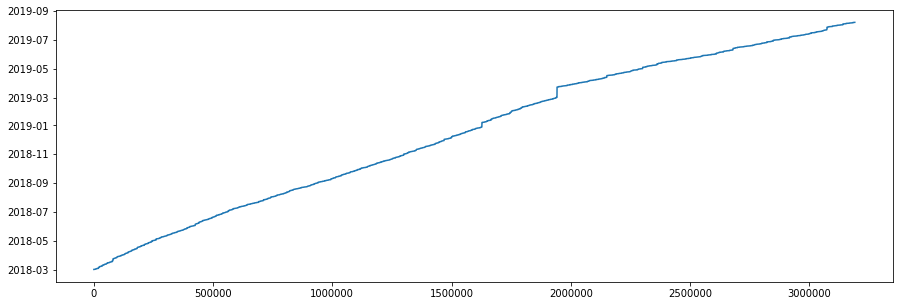

In [7]:
plt.figure(figsize=(15,5))
plt.plot(range(0, len(data)), data['Time'])
plt.ticklabel_format(axis="x",style='plain')
plt.show()

Видно что график имеет четко выраженный тренд.
Для придания ему стационарного вида возьмем разность рядов.
Также поступим и с данными об общем пройденном расстоянии и высоте транспортного средства над уровнем моря, что даст возможность учитывать перепады высот и понять как они отражаются на потреблении топлива.

In [8]:
data['Total Vehicle Distance (km)'] = data['Total Vehicle Distance (km)'].diff()
data['Time'] = data['Time'].diff()
data['Altitude'] = data['Altitude'].diff()
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

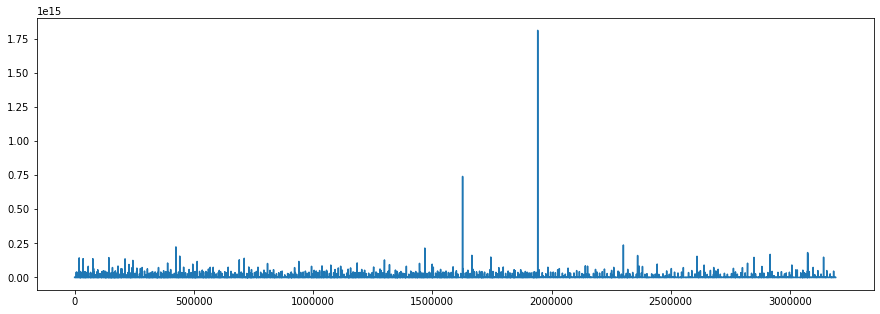

In [9]:
plt.figure(figsize=(15,5))
plt.plot(range(0, len(data)), data['Time'])
plt.ticklabel_format(axis="x",style='plain')
plt.show()

После придания временным рядам стационарности стали отчетливо видны значительные выбросы, что говорит о больших временных промежутках в исходных данных. Это связано как с остановкой двигателя, так и с пробелами в самих исходных данных, когда часть телеметрии периодически переставала сохраняться и была утеряна. Все эти ситуации могут значительно ухудшить качество предсказания моделью расхода топлива и затруднить анализ.

Для минимизации негативного влияния разрывов во временных рядах исключим их попадание более delta_time = 10 секунд в скользящее окно обучающей и проверочной выборок, которые мы будем формировать с шириной окна wind_width = 300 строк. Для этого создадим массивы содержащие корректные номера строк для всего датасета. Всего их будет три: массив для обучающей выборки (correct_idx_train), для проверочной (correct_idx_val) и для всего датасета (correct_idx_all). Впоследствии массивы передаются в генератор, и выборка данных осуществляется только по корректным индексам строк, в которых не будет временных промежутков более 10 секунд. Если еще больше  сокращать временные промежутки в скользящем окне, или вообще включать в скользящее окно данные совсем без временных промежутков (например уменьшив delta_time до 1 секунды), то размер данных для обучения катастрофическим образом сокращается.

In [10]:
wind_width = 300
batch_size = 1024
delta_time = '10s'

\
Ниже по столбцу "Time" видно, что на данный момент в датасете присутствуют временные разрывы более 20 дней, что совершенно недопустимо для анализа потребления топлива на таком длинном временном интервале

In [11]:
data.describe(include='all')

,Time,Latitude,Longitude,Altitude,Speed (km/h),Battery (mV),Acc. Pedal 1 low idle switch,Acc. Pedal Position (%),Engine torque mode,Actual engine - percent torque (%),Engine speed (rpm),Total Vehicle Distance (km),Total Fuel Used (L),Fuel temperature (C),Engine oil temperature 1 (C),Engine Oil Pressure (kPa),Axle Weight (kg),Month by Temp
count,3191199,"3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00","3,191,199.00"
mean,0 days 00:00:14.195496739,55.17,50.41,0.00,64.95,"28,132.13",0.58,25.65,3.13,34.48,"1,259.09",0.08,"81,926.93",47.19,90.86,377.41,"6,746.15",7.52
std,0 days 00:21:44.084580247,2.39,9.42,4.56,22.87,123.55,0.49,35.54,2.24,31.23,172.60,4.80,"22,803.72",9.13,8.60,51.70,"1,859.27",3.27
min,0 days 00:00:01,43.34,29.10,-831.00,0.00,"19,812.00",0.00,0.00,0.00,0.00,0.00,0.00,"38,629.00",-18.00,-16.00,0.00,"1,472.00",1.00
25%,0 days 00:00:02,55.10,43.79,-1.00,58.00,"28,071.00",0.00,0.00,1.00,3.00,"1,219.25",0.00,"62,169.50",40.00,89.00,364.00,"5,367.50",5.00
50%,0 days 00:00:04,55.72,49.37,0.00,75.00,"28,156.00",1.00,0.00,2.00,31.00,"1,302.62",0.12,"83,513.50",48.00,90.00,384.00,"6,760.00",8.00
75%,0 days 00:00:05,56.11,55.60,1.00,80.00,"28,220.00",1.00,53.60,6.00,55.00,"1,345.00",0.12,"103,381.00",55.00,92.00,400.00,"8,196.50",10.00
max,20 days 23:10:15,61.74,87.18,949.00,155.00,"28,392.00",1.00,100.00,8.00,100.00,"2,299.50","8,279.00","115,120.50",79.00,111.00,504.00,"12,222.50",12.00


Создадим массив correct_idx_all, который содержит только те номера строк, которые позволят выбирать из датасета данные с временными промежутками не более delta_time = '10s'

In [12]:
def get_correct_idxs(data, width, min_idx, max_idx, time_delta):
    arr = pd.Series(data.loc[min_idx+width:max_idx].index,index=data.loc[min_idx+width:max_idx].index,dtype='int')
    idxs_of_gaps = data[data['Time'] > pd.Timedelta(time_delta)].index
    idxs_for_drop = set()
    for i in idxs_of_gaps:
        idxs_for_drop.update(set(range(i, i+width-1)))
        data.loc[i, 'Time'] = pd.Timedelta("1s")
        data.loc[i, 'Total Vehicle Distance (km)'] = 0
        data.loc[i, 'Altitude'] = 0
    arr.drop(idxs_for_drop, errors="ignore", inplace=True)
    return arr

correct_idx_all = get_correct_idxs(data, wind_width, 0, len(data)-1, delta_time)

In [13]:
correct_idx_all

431            431
432            432
433            433
434            434
435            435
            ...   
3190958    3190958
3190959    3190959
3190960    3190960
3190961    3190961
3190962    3190962
Length: 1725457, dtype: int64

In [14]:
correct_idx_all.describe()

count   1,725,457.00
mean    1,806,114.89
std       875,362.11
min           431.00
25%     1,097,241.00
50%     1,920,074.00
75%     2,554,807.00
max     3,190,962.00
dtype: float64

\
Для лучшего понимания того какие какие данные могут быть использованы с учетом массива с корректными индексами и текущей ширины окна изобразим их в виде barcode диаграммы. Белые полосы означают промежутки с исключенными номерами строк, которые в принципе не нужны и не попадут в выборки, а зеленые это те номера строк датасета, которые будут участвовать в формировании окна обучающей и проверочной выборок. 

In [15]:
def get_data_used(arr_of_idx, min_idx, max_idx):
    arr = pd.DataFrame(np.zeros(max_idx - min_idx), index=range(min_idx, max_idx),dtype='int')
    for i in arr_of_idx: arr.loc[i - wind_width + 1:i] = 1
    return arr

data_used = get_data_used(correct_idx_all, 0, len(data))

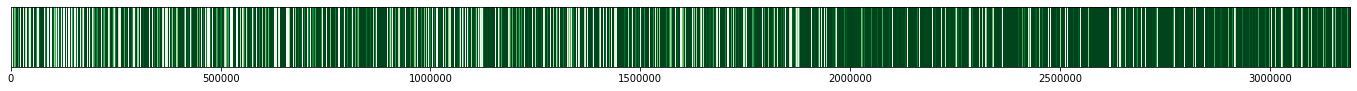

In [16]:
plt.figure(figsize=(24, 1.1))
plt.ticklabel_format(useOffset=False, style='plain')
plt.imshow(data_used.T, aspect='auto', cmap='Greens', extent=[data_used.index[0],data_used.index[-1],0,1]).axes.get_yaxis().set_visible(False)

\
Удалим обнаруженные ненужные данные (белые полосы на диаграмме) из нашего датасета, а также трансформируем correct_idx_all с учетом этого удаления.

In [17]:
data.drop(data_used[data_used.values==0].index, inplace=True)

def tranform_loc_to_iloc(data, arr):
    for i in arr:
        arr[i] = data.index.get_loc(i)
    arr.index = arr.values
    
tranform_loc_to_iloc(data, correct_idx_all)
data.reset_index(drop=True, inplace=True)

\
Уберем аномальные значения в столбцах 'Altitude' и 'Total Vehicle Distance (km)'.

In [18]:
data.loc[(data.loc[:,'Altitude'] < -30) | (data.loc[:,'Altitude'] > 30),'Altitude'] = 0
data.loc[data.loc[:,'Total Vehicle Distance (km)'] > 0.4, 'Total Vehicle Distance (km)'] = 0

\
Разделим массив correct_idx_all на обучающие и проверочные выборки, из которых данных для обучающия будет 80%, а проверочных 20%, при это проверочные будем брать не с конца датасета, а распределенно из всего массива. Подробная визуализация процесса распределения будет ниже.

In [ ]:
def train_validation_split_indices(array_of_indices, train_size = 8):

    percent = len(array_of_indices)/100
    array_train = pd.Series(dtype='int')
    array_validation = pd.Series(dtype='int')

    for i in np.arange(0, len(array_of_indices), percent*10):
        array_train = array_train.append(array_of_indices.iloc[round(i): round(i+train_size*percent)], ignore_index=True)
        array_validation = array_validation.append(array_of_indices.iloc[round(i+train_size*percent): round(i+10*percent)], ignore_index=True)

    return array_train, array_validation

correct_idx_train, correct_idx_val = train_validation_split_indices(correct_idx_all)

\
Массив индексов строк для обучающей выборки:

In [20]:
correct_idx_train

0              299
1              300
2              301
3              302
4              303
            ...   
1380361    2453991
1380362    2453992
1380363    2453993
1380364    2453994
1380365    2453995
Length: 1380366, dtype: int64

In [21]:
correct_idx_train.describe()

count   1,380,366.00
mean    1,302,801.88
std       706,610.57
min           299.00
25%       705,036.25
50%     1,353,175.00
75%     1,911,912.75
max     2,453,995.00
dtype: float64

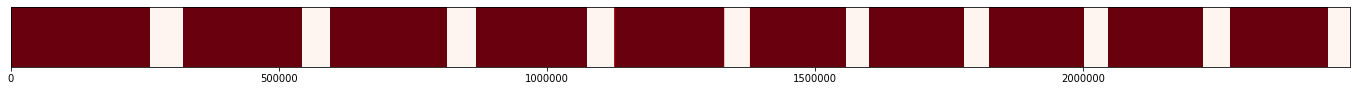

In [22]:
ax = get_data_used(correct_idx_train, 0, len(data))
plt.figure(figsize=(24, 1.1))
plt.ticklabel_format(useOffset=False, style='plain')
plt.imshow(ax.T, aspect='auto', cmap='Reds', extent=[ax.index[0],ax.index[-1],0,1]).axes.get_yaxis().set_visible(False)

\
Массив индексов строк для проверочной выборки

In [23]:
correct_idx_val

0          259431
1          259432
2          259433
3          259434
4          259435
           ...   
345086    2497171
345087    2497172
345088    2497173
345089    2497174
345090    2497175
Length: 345091, dtype: int64

In [24]:
correct_idx_val.describe()

count     345,091.00
mean    1,427,319.16
std       690,978.40
min       259,431.00
25%       840,345.50
50%     1,555,410.00
75%     2,022,106.50
max     2,497,175.00
dtype: float64

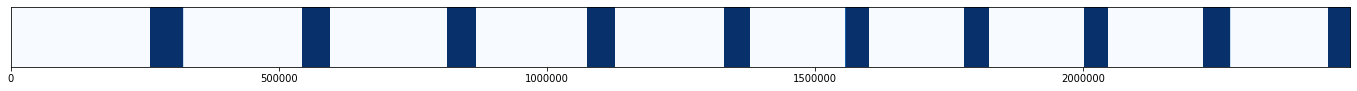

In [25]:
ax = get_data_used(correct_idx_val, 0, len(data))
plt.figure(figsize=(24, 1.1))
plt.ticklabel_format(useOffset=False, style='plain')
plt.imshow(ax.T, aspect='auto', cmap='Blues', extent=[ax.index[0],ax.index[-1],0,1]).axes.get_yaxis().set_visible(False)

Насколько можно заметить выше, номера строк в массивах обучающей и проверочной выборок пересечений не имеют:

\
Преобразуем временные данные в числовые значения перед передачей в массив numpy, а также переставим столбцы

In [26]:
data['Time'] = data['Time'].dt.seconds

data = data[[
    'Time',
    'Month by Temp',            
    'Latitude',
    'Longitude',
    'Altitude',
    'Total Vehicle Distance (km)',
    'Speed (km/h)',
    'Acc. Pedal 1 low idle switch',
    'Acc. Pedal Position (%)',
    'Engine torque mode',
    'Actual engine - percent torque (%)',
    'Engine speed (rpm)',
    'Battery (mV)',
    'Fuel temperature (C)',
    'Engine oil temperature 1 (C)',
    'Engine Oil Pressure (kPa)',
    'Axle Weight (kg)',
    'Total Fuel Used (L)']]

feature_names = data.columns.to_list()
data = data.to_numpy(np.float32)

\
\
Переименуем названия столбцов

In [27]:
def rename_feature(search_name, result_name):
    feature_names[feature_names.index(search_name)] = result_name

rename_feature('Time', 'Пропуски во времени (с)')
rename_feature('Month by Temp', 'Месяц (по температуре)')
rename_feature('Latitude', 'Широта (координаты)')
rename_feature('Longitude', 'Долгота (координаты)')
rename_feature('Altitude', 'Смещение по высоте')
rename_feature('Speed (km/h)', 'Скорость (км/ч)')
rename_feature('Battery (mV)', 'Аккумулятор (мВ)')
rename_feature('Acc. Pedal Position (%)', 'Положение педали "газа"(%)')
rename_feature('Acc. Pedal 1 low idle switch', 'Педаль "газа" в режиме холост. хода')
rename_feature('Engine torque mode', 'Режим крут. момента двигателя')
rename_feature('Actual engine - percent torque (%)', 'Текущий крутящий момент (%)')
rename_feature('Engine speed (rpm)', 'Скорость двигателя (об/мин)')
rename_feature('Total Vehicle Distance (km)', 'Смещение по расстоянию (км)')
rename_feature('Fuel temperature (C)', 'Температура топлива (С)')
rename_feature('Engine oil temperature 1 (C)', 'Температура моторного масла (C)')
rename_feature('Engine Oil Pressure (kPa)', 'Давление моторного масла (кПа)')
rename_feature('Axle Weight (kg)', 'Нагрузка на ось (кг)')

\
\
Создадим из столбца о всем потребленном топливе 'Total Fuel Used (L)' новый столбец с расходом топлива, согласно таблицы корректных индексов

In [28]:
data = np.hstack((data, np.full((len(data), 1), np.nan)))
for i in correct_idx_all:
    data[i,-1] = data[i, -2] - data[i-wind_width+1, -2]
data = np.delete(data,-2,1)
feature_names[-1] = "Расход топлива (л)"

\
\
Оценим получившийся датасет до нормализации

In [29]:
pd.DataFrame(data[correct_idx_all.iloc[0]:correct_idx_all.iloc[-1]], columns = feature_names)

,Пропуски во времени (с),Месяц (по температуре),Широта (координаты),Долгота (координаты),Смещение по высоте,Смещение по расстоянию (км),Скорость (км/ч),"Педаль ""газа"" в режиме холост. хода","Положение педали ""газа""(%)",Режим крут. момента двигателя,Текущий крутящий момент (%),Скорость двигателя (об/мин),Аккумулятор (мВ),Температура топлива (С),Температура моторного масла (C),Давление моторного масла (кПа),Нагрузка на ось (кг),Расход топлива (л)
0,5.00,4.00,55.73,48.76,4.00,0.00,75.00,0.00,68.00,1.00,63.00,"1,256.12","28,192.00",31.00,89.00,360.00,"6,392.00",11.50
1,5.00,4.00,55.73,48.76,-2.00,0.12,74.00,0.00,65.60,1.00,60.00,"1,244.88","28,160.00",31.00,89.00,356.00,"6,394.00",11.50
2,5.00,4.00,55.73,48.76,4.00,0.12,74.00,0.00,66.40,1.00,61.00,"1,250.75","28,187.00",31.00,89.00,356.00,"6,394.00",12.00
3,5.00,4.00,55.73,48.76,2.00,0.12,73.00,1.00,0.00,2.00,0.00,"1,192.50","28,178.00",30.00,89.00,360.00,"6,452.50",12.00
4,7.00,4.00,55.73,48.76,-4.00,0.12,69.00,1.00,0.00,2.00,0.00,"1,134.62","28,189.00",30.00,89.00,344.00,"6,390.00",12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496871,1.00,11.00,55.09,68.28,0.00,0.00,14.00,1.00,0.00,2.00,5.00,601.62,"27,873.00",57.00,91.00,140.00,"3,971.00",3.00
2496872,1.00,11.00,55.09,68.28,0.00,0.00,12.00,1.00,0.00,2.00,4.00,607.38,"27,848.00",57.00,91.00,144.00,"3,971.00",3.00
2496873,1.00,11.00,55.09,68.28,0.00,0.00,11.00,1.00,0.00,2.00,5.00,604.88,"27,903.00",57.00,91.00,144.00,"3,951.00",3.00
2496874,1.00,11.00,55.09,68.28,-1.00,0.00,8.00,1.00,0.00,2.00,4.00,607.88,"27,900.00",57.00,91.00,144.00,"3,964.00",3.00


In [30]:
pd.DataFrame(data[:,:], columns = feature_names).describe()

,Пропуски во времени (с),Месяц (по температуре),Широта (координаты),Долгота (координаты),Смещение по высоте,Смещение по расстоянию (км),Скорость (км/ч),"Педаль ""газа"" в режиме холост. хода","Положение педали ""газа""(%)",Режим крут. момента двигателя,Текущий крутящий момент (%),Скорость двигателя (об/мин),Аккумулятор (мВ),Температура топлива (С),Температура моторного масла (C),Давление моторного масла (кПа),Нагрузка на ось (кг),Расход топлива (л)
count,"2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","1,725,457.00"
mean,3.53,7.60,55.23,50.64,-0.00,0.07,71.18,0.63,24.56,3.50,36.79,"1,293.97","28,138.20",47.88,90.61,381.00,"6,861.66",6.58
std,1.82,3.28,2.37,9.48,2.48,0.06,16.32,0.48,35.82,2.26,31.37,125.40,111.24,8.53,5.46,37.48,"1,774.24",2.35
min,1.00,1.00,43.34,29.10,-30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"26,907.00",3.00,15.00,0.00,"1,953.50",0.50
25%,2.00,5.00,55.06,44.04,-1.00,0.00,68.00,0.00,0.00,1.00,4.00,"1,254.75","28,076.00",41.00,89.00,368.00,"5,501.00",4.50
50%,4.00,8.00,55.70,49.33,0.00,0.12,77.00,1.00,0.00,3.00,34.00,"1,308.38","28,160.00",49.00,91.00,384.00,"6,860.00",6.50
75%,5.00,10.00,56.12,55.73,1.00,0.12,80.00,1.00,52.80,6.00,58.00,"1,348.00","28,222.00",55.00,93.00,400.00,"8,257.50",8.50
max,10.00,12.00,61.71,87.12,30.00,0.38,155.00,1.00,100.00,7.00,100.00,"2,238.75","28,384.00",69.00,111.00,504.00,"12,222.50",16.00


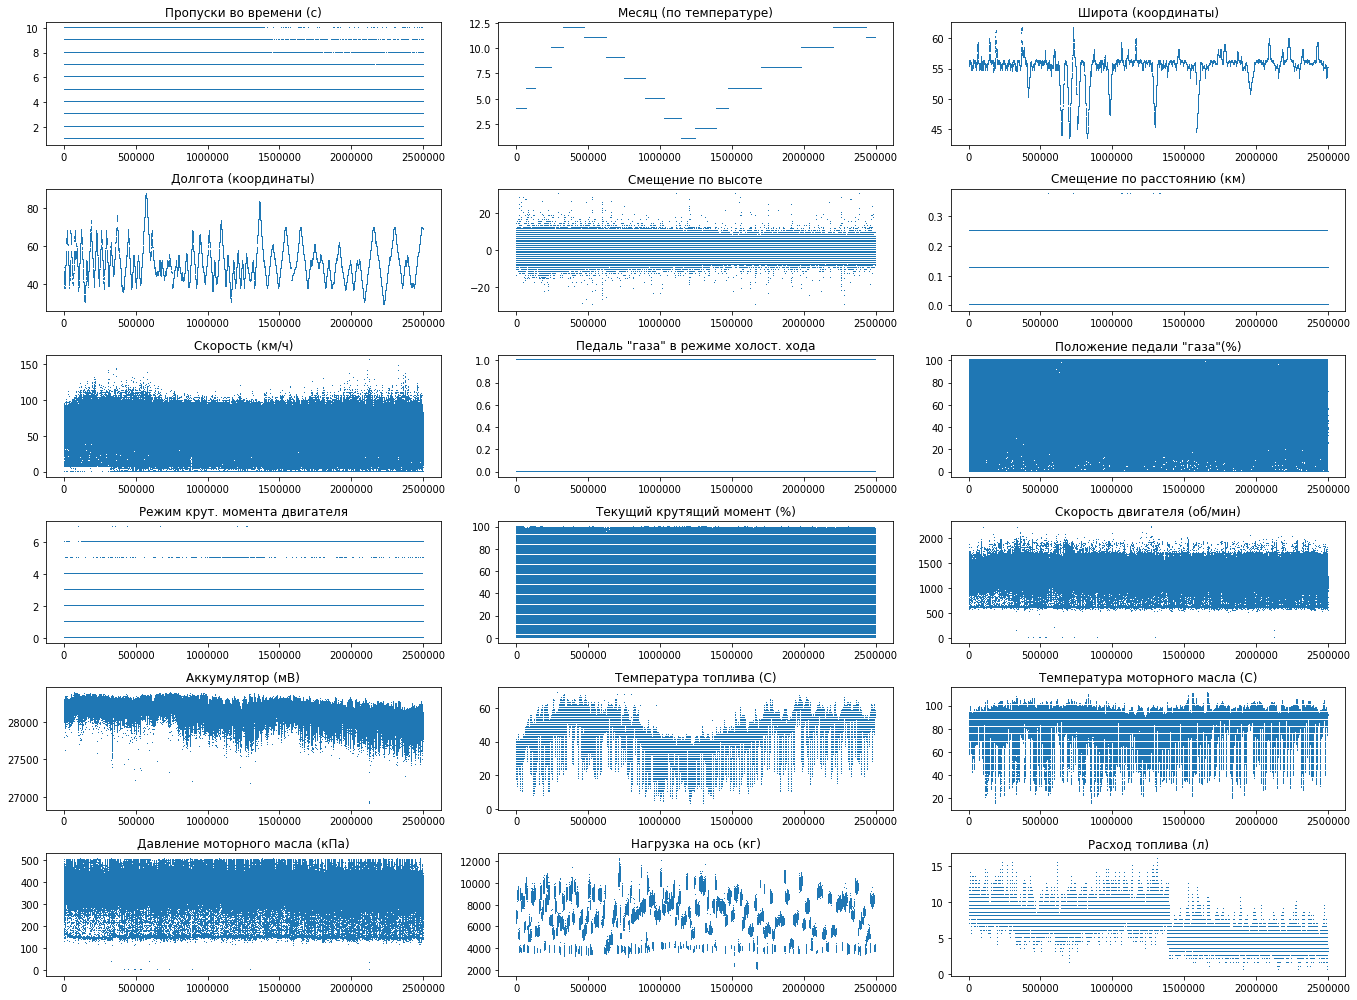

In [31]:
plt.figure(figsize=(19,14))
plot_number = 1
for i, columns in enumerate(feature_names):
    ax = plt.subplot(6, 3, plot_number)
    plt.plot(range(0, len(data[:,i])), data[:,i], ',')
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

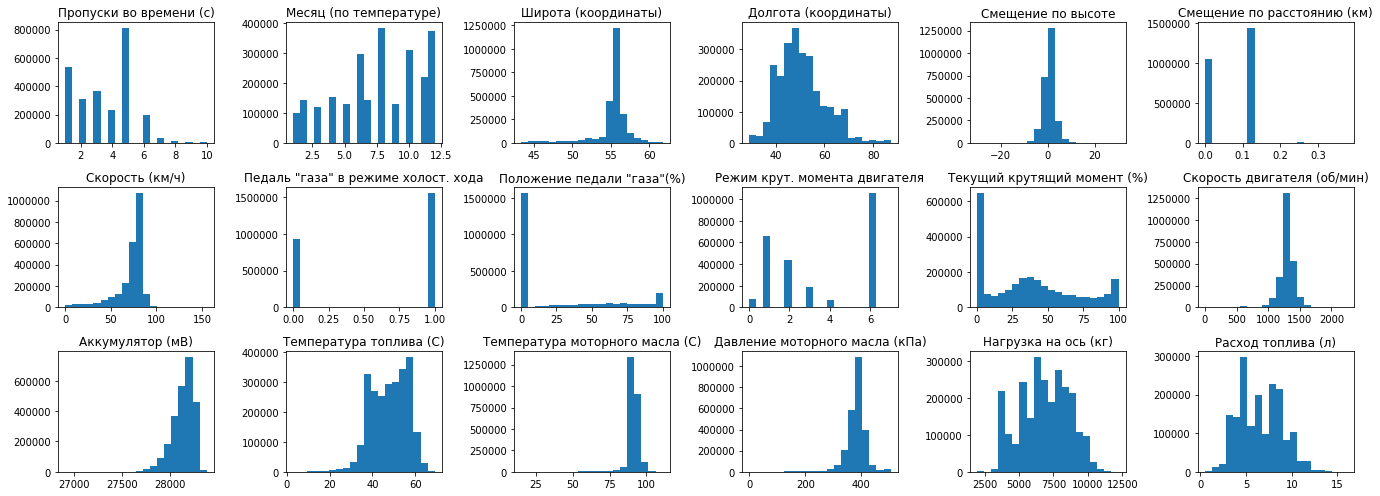

In [32]:
plt.figure(figsize=(19,7))
plot_number = 1
for i, columns in enumerate(feature_names):
    ax = plt.subplot(3, 6, plot_number)
    plt.hist(data[:,i],bins = 20)
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

\
\
Проведем нормализацию данных

In [33]:
from scipy.stats import yeojohnson
data[:,feature_names.index('Пропуски во времени (с)')] = yeojohnson(data[:,feature_names.index('Пропуски во времени (с)')], lmbda=0.01)
data[:,feature_names.index('Смещение по расстоянию (км)')] = yeojohnson(data[:,feature_names.index('Смещение по расстоянию (км)')], lmbda=0.01)
data[:,feature_names.index('Аккумулятор (мВ)')] = yeojohnson(data[:,feature_names.index('Аккумулятор (мВ)')], lmbda=30)
mean  = data[:,:-1].mean(axis = 0)
data[:,:-1] -= mean
std  = data[:,:-1].std(axis = 0)
data[:,:-1] /= std
nanstd = np.nanstd(data[:,-1], axis = 0)
data[:,-1] /= nanstd

### Конечный набор данных для обучения

In [34]:
pd.DataFrame(data[correct_idx_all.iloc[0]:correct_idx_all.iloc[-1]], columns = feature_names)

,Пропуски во времени (с),Месяц (по температуре),Широта (координаты),Долгота (координаты),Смещение по высоте,Смещение по расстоянию (км),Скорость (км/ч),"Педаль ""газа"" в режиме холост. хода","Положение педали ""газа""(%)",Режим крут. момента двигателя,Текущий крутящий момент (%),Скорость двигателя (об/мин),Аккумулятор (мВ),Температура топлива (С),Температура моторного масла (C),Давление моторного масла (кПа),Нагрузка на ось (кг),Расход топлива (л)
0,0.82,-1.10,0.21,-0.20,1.62,-1.16,0.23,-1.29,1.21,-1.11,0.84,-0.30,0.46,-1.98,-0.29,-0.56,-0.26,4.89
1,0.82,-1.10,0.21,-0.20,-0.81,0.83,0.17,-1.29,1.15,-1.11,0.74,-0.39,0.15,-1.98,-0.29,-0.67,-0.26,4.89
2,0.82,-1.10,0.21,-0.20,1.62,0.83,0.17,-1.29,1.17,-1.11,0.77,-0.34,0.41,-1.98,-0.29,-0.67,-0.26,5.10
3,0.82,-1.10,0.21,-0.20,0.81,0.83,0.11,0.77,-0.69,-0.66,-1.17,-0.81,0.33,-2.10,-0.29,-0.56,-0.23,5.10
4,1.46,-1.10,0.21,-0.20,-1.62,0.83,-0.13,0.77,-0.69,-0.66,-1.17,-1.27,0.43,-2.10,-0.29,-0.99,-0.27,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496871,-1.59,1.04,-0.06,1.86,0.00,-1.16,-3.50,0.77,-0.69,-0.66,-1.01,-5.52,-2.25,1.07,0.07,-6.43,-1.63,1.27
2496872,-1.59,1.04,-0.06,1.86,0.00,-1.16,-3.63,0.77,-0.69,-0.66,-1.05,-5.48,-2.42,1.07,0.07,-6.32,-1.63,1.27
2496873,-1.59,1.04,-0.06,1.86,0.00,-1.16,-3.69,0.77,-0.69,-0.66,-1.01,-5.49,-2.03,1.07,0.07,-6.32,-1.64,1.27
2496874,-1.59,1.04,-0.06,1.86,-0.40,-1.16,-3.87,0.77,-0.69,-0.66,-1.05,-5.47,-2.05,1.07,0.07,-6.32,-1.63,1.27


In [35]:
pd.DataFrame(data[:,:], columns = feature_names).describe()

,Пропуски во времени (с),Месяц (по температуре),Широта (координаты),Долгота (координаты),Смещение по высоте,Смещение по расстоянию (км),Скорость (км/ч),"Педаль ""газа"" в режиме холост. хода","Положение педали ""газа""(%)",Режим крут. момента двигателя,Текущий крутящий момент (%),Скорость двигателя (об/мин),Аккумулятор (мВ),Температура топлива (С),Температура моторного масла (C),Давление моторного масла (кПа),Нагрузка на ось (кг),Расход топлива (л)
count,"2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","2,497,176.00","1,725,457.00"
mean,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,2.80
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.59,-2.01,-5.02,-2.27,-12.12,-1.16,-4.36,-1.29,-0.69,-1.55,-1.17,-10.32,-6.60,-5.26,-13.84,-10.16,-2.77,0.21
25%,-0.70,-0.79,-0.07,-0.70,-0.40,-1.16,-0.19,-1.29,-0.69,-1.11,-1.05,-0.31,-0.63,-0.81,-0.29,-0.35,-0.77,1.91
50%,0.42,0.12,0.20,-0.14,0.00,0.83,0.36,0.77,-0.69,-0.22,-0.09,0.11,0.15,0.13,0.07,0.08,-0.00,2.76
75%,0.82,0.73,0.38,0.54,0.40,0.83,0.54,0.77,0.79,1.10,0.68,0.43,0.77,0.83,0.44,0.51,0.79,3.61
max,2.17,1.34,2.74,3.85,12.12,4.23,5.14,0.77,2.11,1.55,2.01,7.53,2.58,2.47,3.73,3.28,3.02,6.80


#### 
#### Графики распределения признаков по всему датасету:

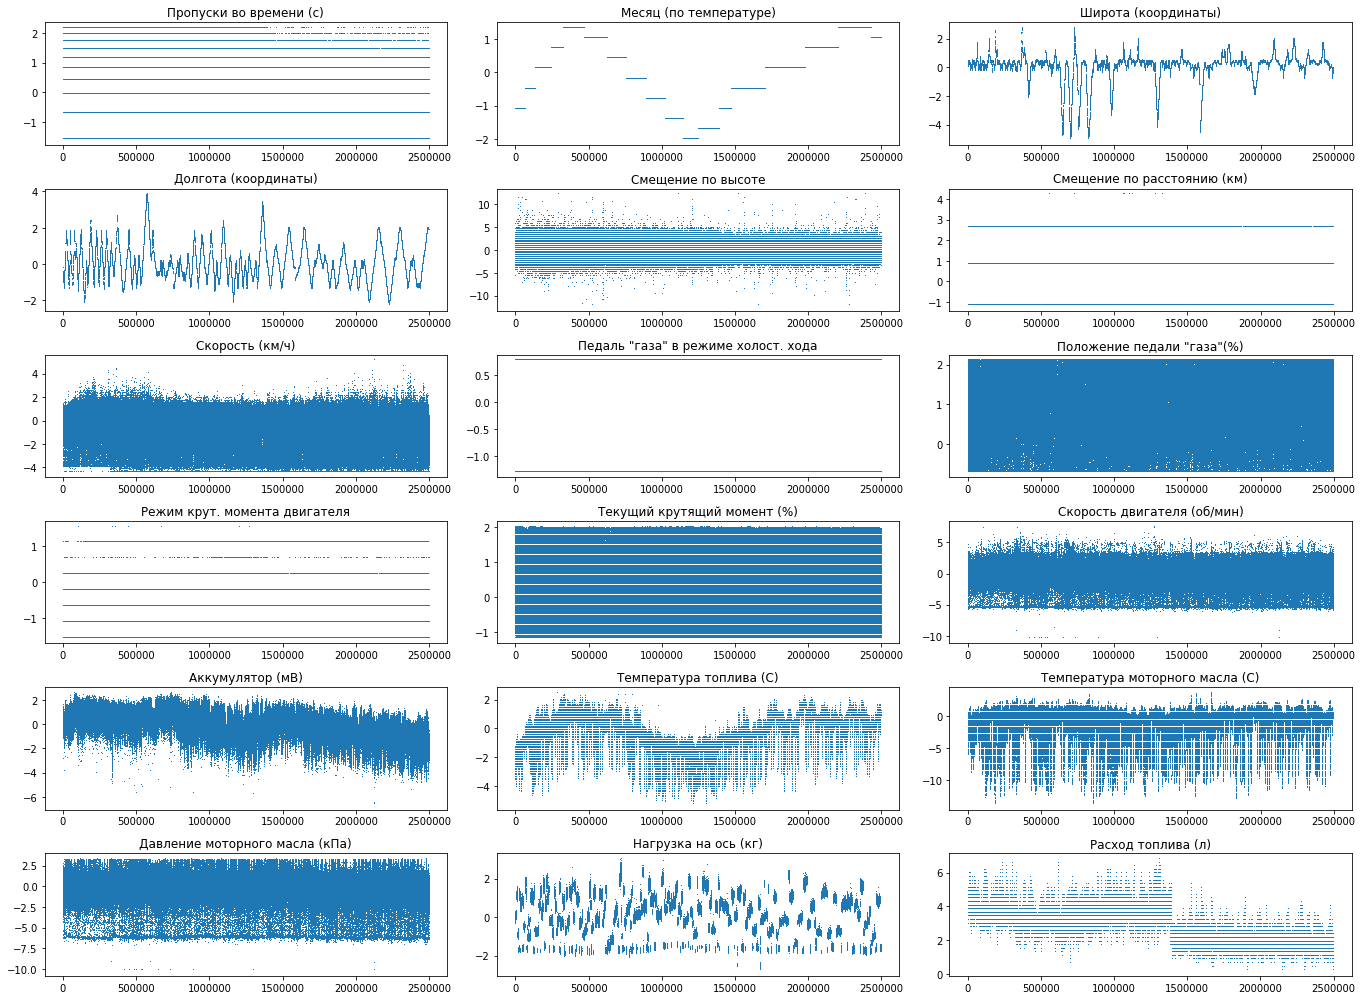

In [36]:
plt.figure(figsize=(19,14))
plot_number = 1
for i, columns in enumerate(feature_names):
    ax = plt.subplot(6, 3, plot_number)
    plt.plot(range(0, len(data[:,i])), data[:,i], ',')
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

#### 
#### Гистограммы

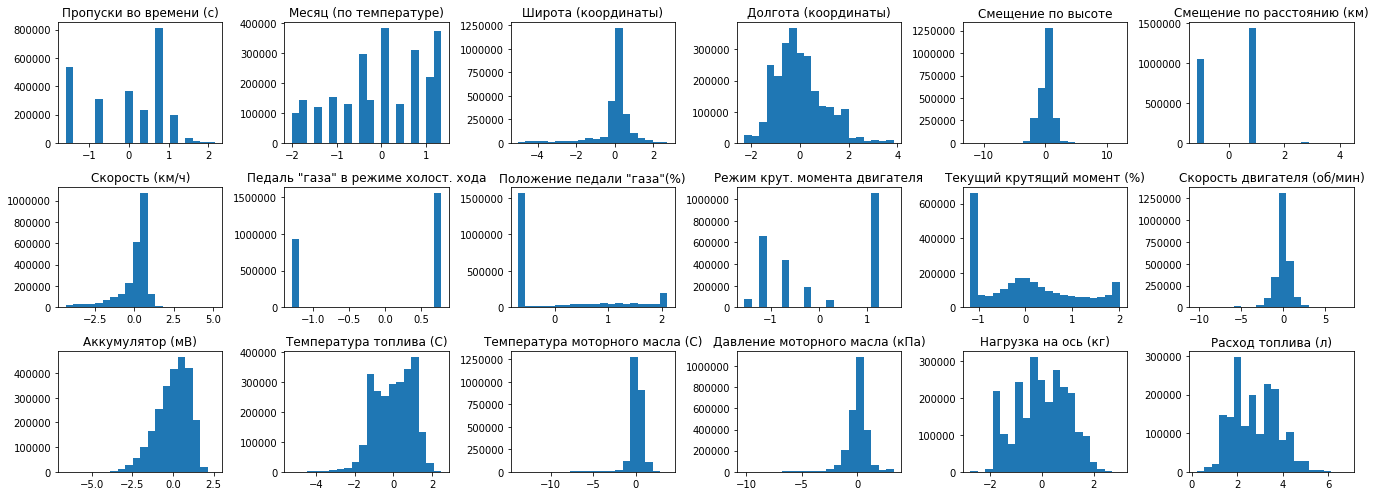

In [37]:
plt.figure(figsize=(19,7))
plot_number = 1
for i, columns in enumerate(feature_names):
    ax = plt.subplot(3, 6, plot_number)
    plt.hist(data[:,i],bins = 20)
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

Создадим генераторы для извлечения данных их датасета.
На основе массива данных с допустимыми индексами можно обходить датасет по разному: 
 - shuffle = False - последовательно со значительным пересечением (наложением) скользящих окон в батче
 - shuffle = True - случайное формирование скользящих окон в батче, в которых возможно частичное или полное непересечение скользящих окон в батче
 - disjoint_wind = True - последовательно без пересечений окон, когда в батч попадают окна не имеющих общих пересекающихся строк

In [38]:
def generator(data, wind_width, correct_idx, batch_size = batch_size, shuffle = True, disjoint_wind = False):
    j = 0
    i_last = 0
    while True:
        if shuffle:
            rows = np.random.choice(correct_idx, batch_size, replace=False )
        else:
            if disjoint_wind:
                rows = []
                for k in range(batch_size):
                    rows.append(correct_idx[i_last])
                    while correct_idx[i_last] < rows[-1] + wind_width-1:
                        if i_last < len(correct_idx)-1:
                            i_last += 1
                        else:
                            i_last = np.random.randint(0, wind_width)
                            break
            else:
                rows = correct_idx[j:j+batch_size]
                j += batch_size
                if j+batch_size > len(correct_idx)-1:
                    j = 0
        samples = np.empty((len(rows), wind_width, data.shape[-1] - 1))
        targets = np.empty((len(rows),))
        for i, row in enumerate(rows):
            samples[i] = data[row - wind_width + 1:row + 1, :-1]
            targets[i] = data[row, -1]
        yield samples,targets

Наилучшие результаты при обучении модели показал вариант со случайным формированием скользящих окон в батче, его и будем использовать

In [39]:
train_gen = generator(data, wind_width, correct_idx_train.to_numpy(np.int64))
val_gen   = generator(data, wind_width, correct_idx_val.to_numpy(np.int64))
all_gen   = generator(data, wind_width, correct_idx_all.to_numpy(np.int64))

### Распределение данных на обучающей выборке

In [40]:
correct_idx_train

0              299
1              300
2              301
3              302
4              303
            ...   
1380361    2453991
1380362    2453992
1380363    2453993
1380364    2453994
1380365    2453995
Length: 1380366, dtype: int64

In [41]:
correct_idx_train.describe()

count   1,380,366.00
mean    1,302,801.88
std       706,610.57
min           299.00
25%       705,036.25
50%     1,353,175.00
75%     1,911,912.75
max     2,453,995.00
dtype: float64

\
\
Для того чтобы избежать наложения окон друг на друга создадим функцию которая извлечет из массива с корректными индексами новый массив, но уже без пересечений окон. Получившиеся массивы пригодятся для построения графиков и последующего анализа получившейся модели.

In [42]:
def get_arr_of_idx_disjoint(correct_idx, wind_width):
    arr = []
    i = 0
    while i < len(correct_idx)-1:
        arr.append(correct_idx.iloc[i])
        while (correct_idx.iloc[i] < arr[-1] + wind_width) and (i < len(correct_idx)-1):
            i += 1
    arr = pd.Series(arr)
    return arr

correct_idx_train_disjoint = get_arr_of_idx_disjoint(correct_idx_train, wind_width)

\
Функция ниже необходима чтобы извлекать данные для построение графиков из датасета только с помощью генератора, также как это будет происходить при обучении

In [43]:
def get_values_from_gen_by_feature_number(idx_arr, feature_number):
    if feature_number != data.shape[-1]-1:
        gen = generator(data, wind_width, idx_arr.to_numpy(np.int64), batch_size = 1, shuffle = False)
        arr = np.array([])
        for i in range(0, len(idx_arr)-1):
            arr = np.concatenate((arr, next(gen)[0][0][:,feature_number]))
    else:
        gen = generator(data, wind_width, idx_arr.to_numpy(np.int64), batch_size = 1, shuffle = False)
        arr = np.empty(len(idx_arr)-1)
        for i in range(0, len(arr)):
            arr[i] = next(gen)[1]
    return arr

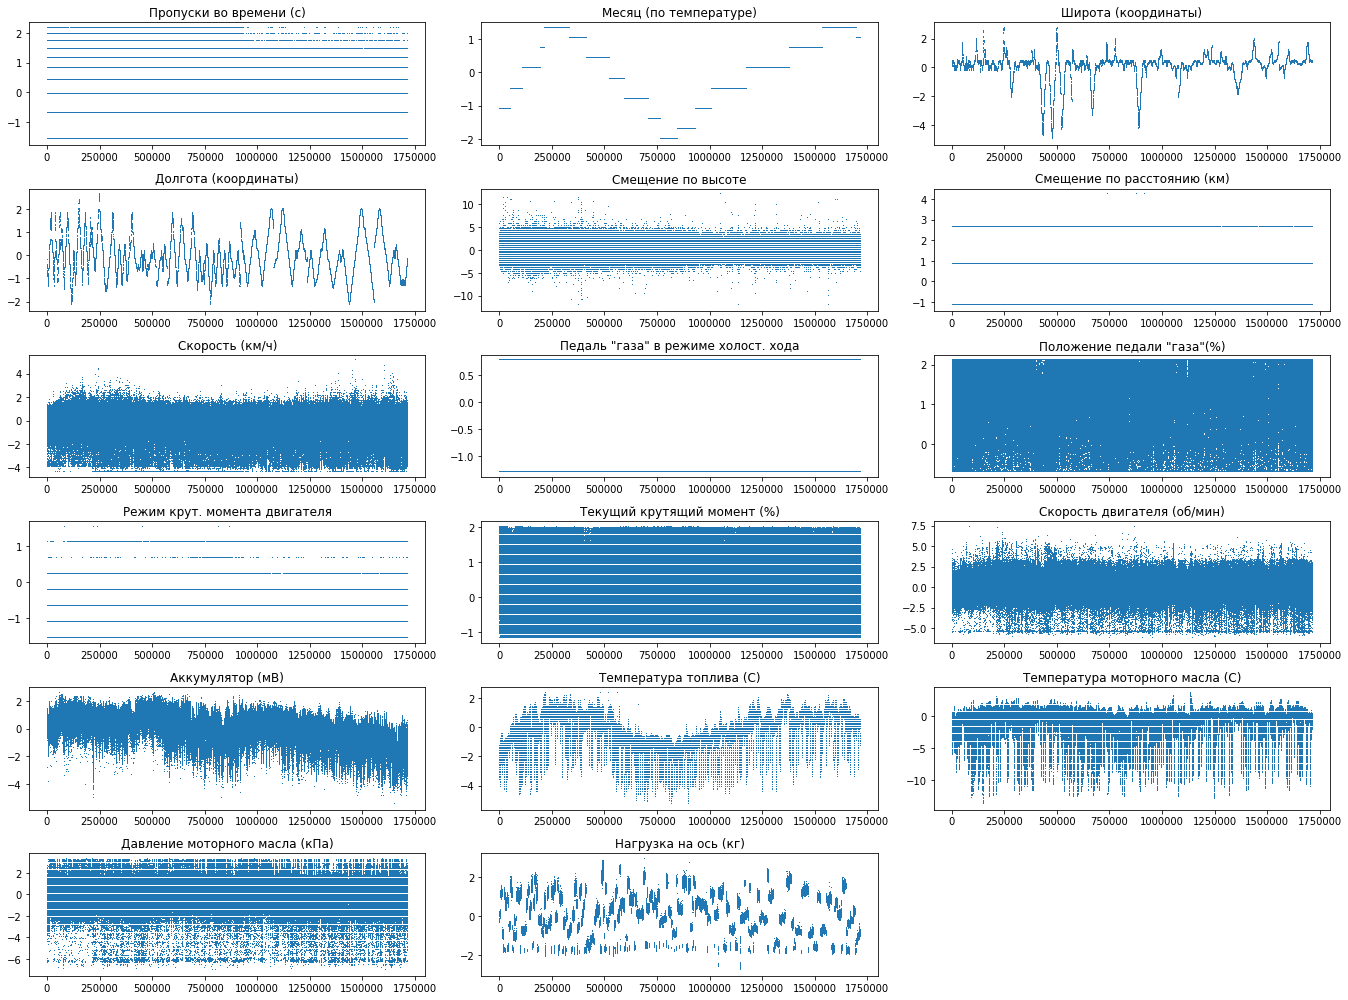

In [44]:
plt.figure(figsize=(19,14))
plot_number = 1
for i, columns in enumerate(feature_names[:-1]):
    ax = plt.subplot(6, 3, plot_number)
    feature_values = get_values_from_gen_by_feature_number(idx_arr = correct_idx_train_disjoint, feature_number = i)
    plt.plot(range(0, len(feature_values)), feature_values, ',')
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

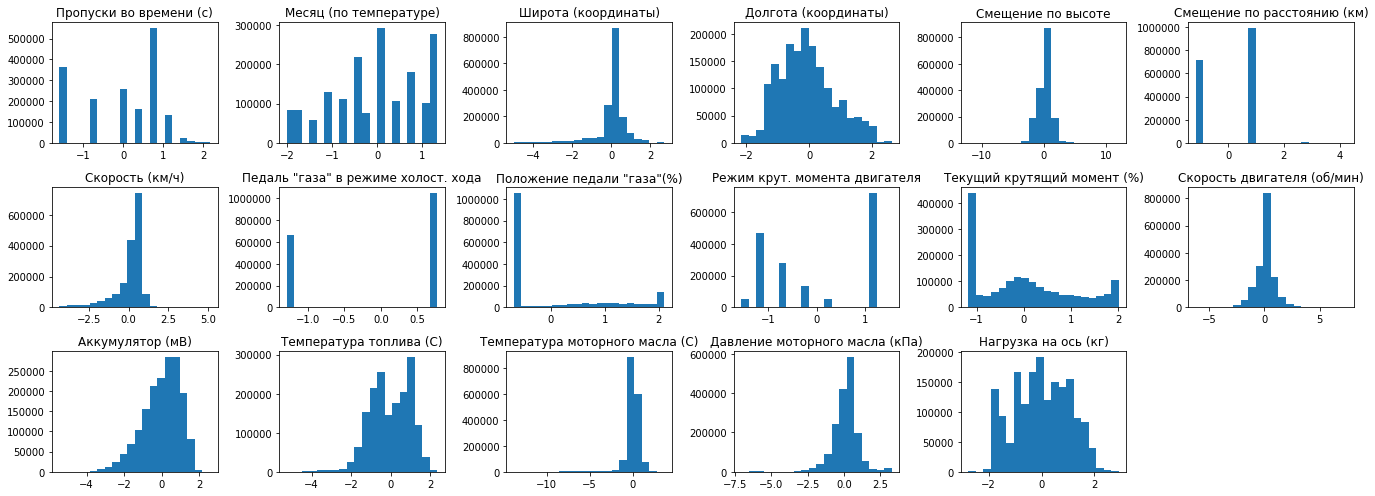

In [45]:
plt.figure(figsize=(19,7))
plot_number = 1
for i, columns in enumerate(feature_names[:-1]):
    ax = plt.subplot(3, 6, plot_number)
    feature_values = get_values_from_gen_by_feature_number(idx_arr = correct_idx_train_disjoint, feature_number = i)
    plt.hist(feature_values, bins = 20)
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

### Распределение целевых показателей расхода топлива на обучающей выборке

In [46]:
train_targets = get_values_from_gen_by_feature_number(idx_arr = correct_idx_train, feature_number = data.shape[-1]-1)

In [47]:
pd.Series(train_targets)

0         4.89
1         4.89
2         5.10
3         5.10
4         5.10
          ... 
1380360   2.12
1380361   2.12
1380362   2.12
1380363   2.12
1380364   2.34
Length: 1380365, dtype: float64

In [48]:
pd.Series(train_targets).describe()

count   1,380,365.00
mean            2.79
std             1.00
min             0.21
25%             1.91
50%             2.76
75%             3.61
max             6.80
dtype: float64

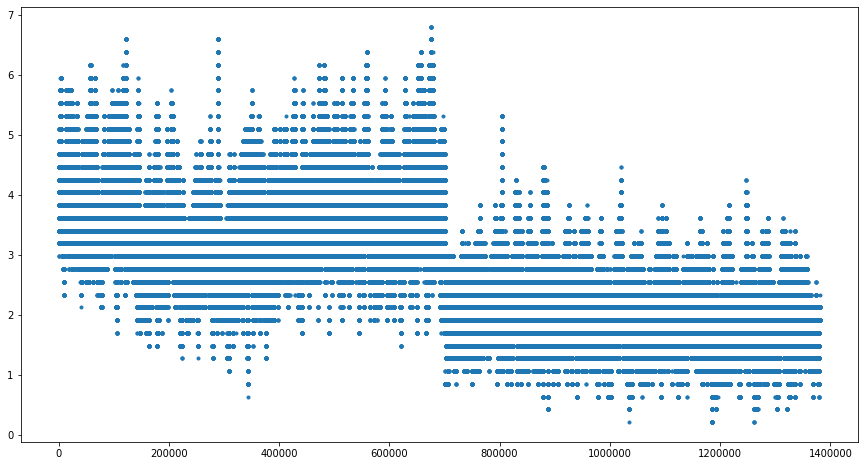

In [49]:
plt.figure(figsize=(15,8))
pl = train_targets
plt.plot(range(0, len(pl)), pl, '.')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

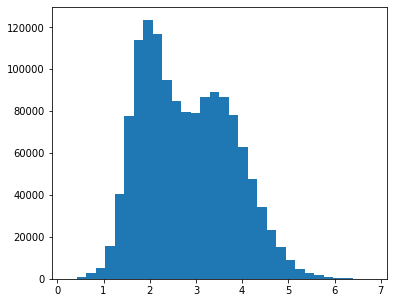

In [50]:
plt.figure(figsize=(6,5))
pl = train_targets
plt.hist(pl,bins = 32)
plt.show()

На графиках прекрасно видна дискретность исходных данных. Но даже с учетом этого точность предсказаний модели в итоге составит около 95% (MAPE).

### Распределение данных на проверочной выборке

In [51]:
correct_idx_val

0          259431
1          259432
2          259433
3          259434
4          259435
           ...   
345086    2497171
345087    2497172
345088    2497173
345089    2497174
345090    2497175
Length: 345091, dtype: int64

In [52]:
correct_idx_val.describe()

count     345,091.00
mean    1,427,319.16
std       690,978.40
min       259,431.00
25%       840,345.50
50%     1,555,410.00
75%     2,022,106.50
max     2,497,175.00
dtype: float64

In [53]:
correct_idx_val_disjoint = get_arr_of_idx_disjoint(correct_idx_val, wind_width)

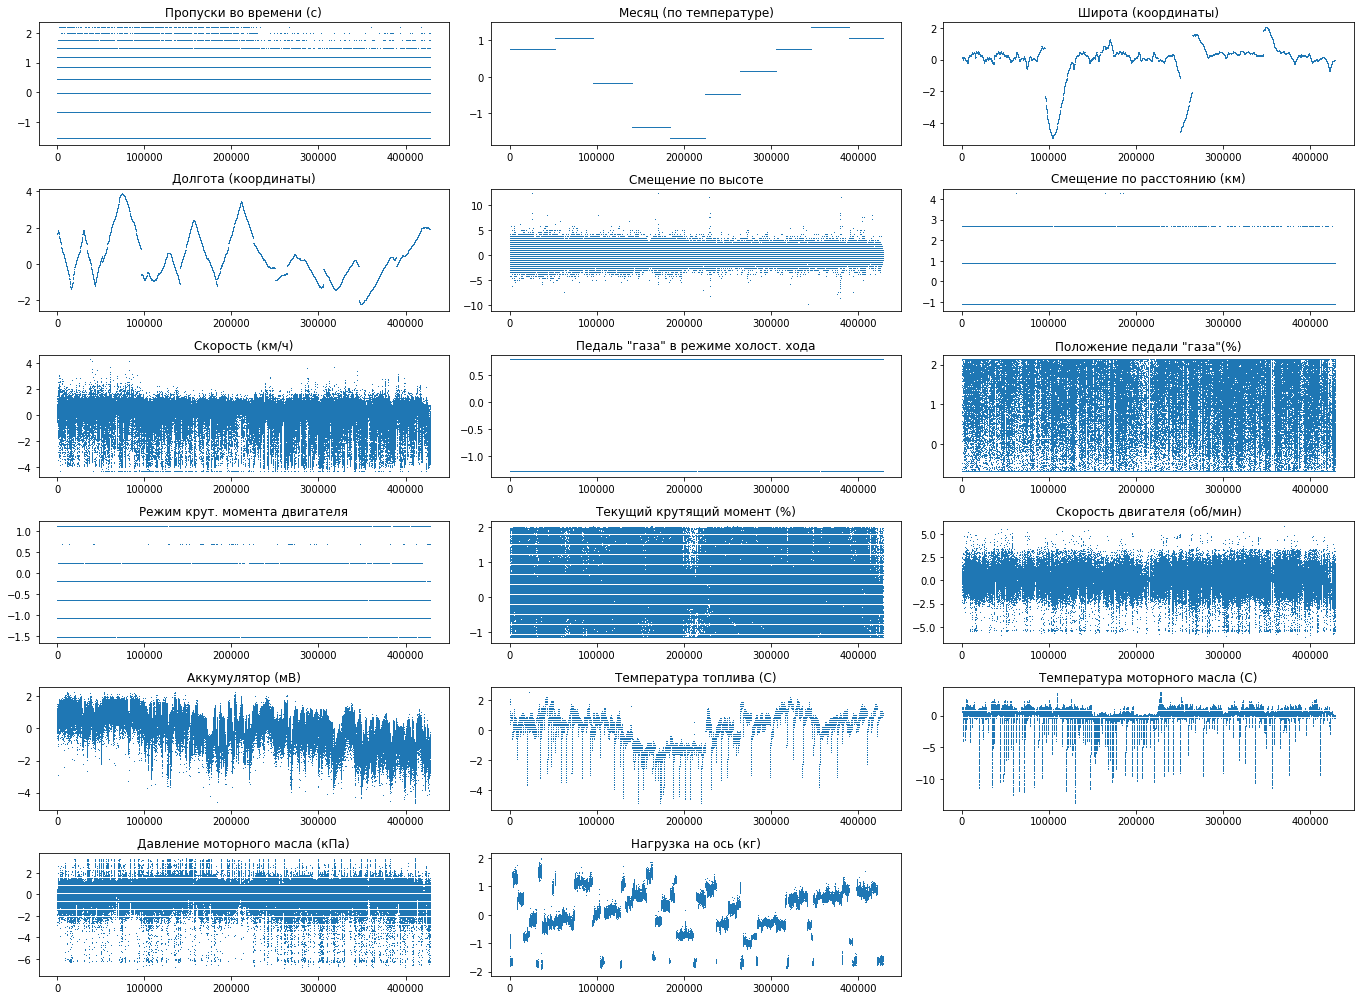

In [54]:
plt.figure(figsize=(19,14))
plot_number = 1
for i, columns in enumerate(feature_names[:-1]):
    ax = plt.subplot(6, 3, plot_number)
    feature_values = get_values_from_gen_by_feature_number(idx_arr = correct_idx_val_disjoint, feature_number = i)
    plt.plot(range(0, len(feature_values)), feature_values, ',')
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

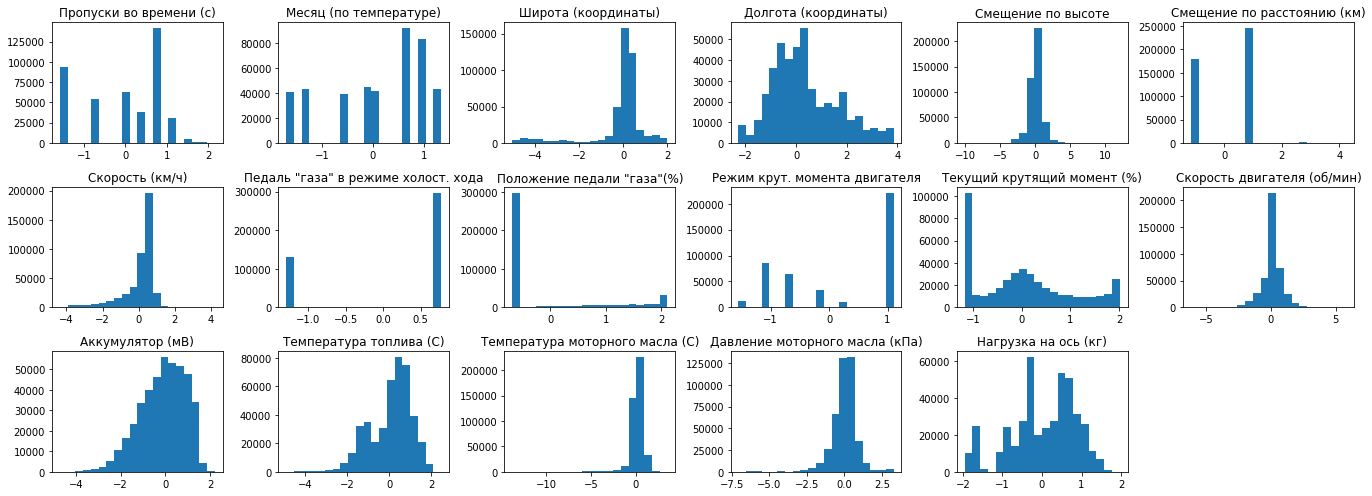

In [55]:
plt.figure(figsize=(19,7))
plot_number = 1
for i, columns in enumerate(feature_names[:-1]):
    ax = plt.subplot(3, 6, plot_number)
    feature_values = get_values_from_gen_by_feature_number(idx_arr = correct_idx_val_disjoint, feature_number = i)
    plt.hist(feature_values, bins = 20)
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

### Распределение целевых показателей расхода топлива на проверочной выборке

In [56]:
val_targets = get_values_from_gen_by_feature_number(idx_arr = correct_idx_val, feature_number = data.shape[-1]-1)

In [57]:
pd.Series(val_targets)

0        3.82
1        3.82
2        3.82
3        3.61
4        3.61
         ... 
345085   1.27
345086   1.27
345087   1.27
345088   1.27
345089   1.27
Length: 345090, dtype: float64

In [58]:
pd.Series(val_targets).describe()

count   345,090.00
mean          2.81
std           0.99
min           0.21
25%           1.91
50%           2.76
75%           3.61
max           6.59
dtype: float64

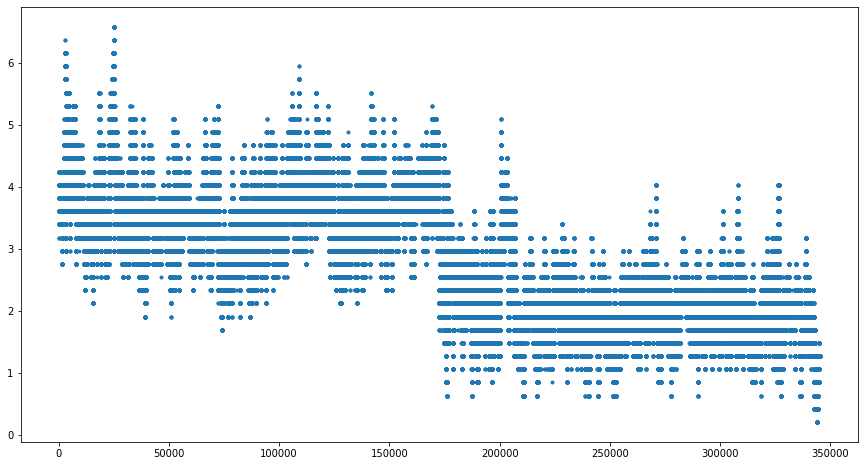

In [59]:
plt.figure(figsize=(15,8))
pl = val_targets
plt.plot(range(0, len(pl)), pl, '.')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

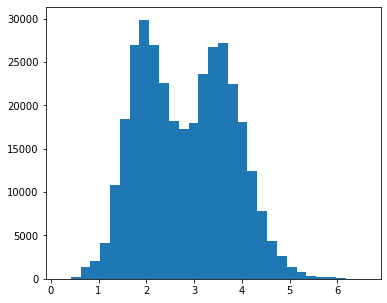

In [60]:
plt.figure(figsize=(6,5))
pl = val_targets
plt.hist(pl,bins = 31)
plt.show()

### 
### Проанализируем один из типичных батчей на обучающей выборке

In [61]:
test_samples = next(train_gen)

В батче находится 1024 сэмпла из 320 строк

In [62]:
test_samples[0].shape

(1024, 300, 17)

Ниже один из 1024 сэмплов:

In [63]:
pd.DataFrame(test_samples[0][0],columns = feature_names[:-1])

,Пропуски во времени (с),Месяц (по температуре),Широта (координаты),Долгота (координаты),Смещение по высоте,Смещение по расстоянию (км),Скорость (км/ч),"Педаль ""газа"" в режиме холост. хода","Положение педали ""газа""(%)",Режим крут. момента двигателя,Текущий крутящий момент (%),Скорость двигателя (об/мин),Аккумулятор (мВ),Температура топлива (С),Температура моторного масла (C),Давление моторного масла (кПа),Нагрузка на ось (кг)
0,-0.70,1.34,-0.09,1.88,-1.21,-1.16,-0.19,0.77,-0.69,-0.66,-1.17,0.41,-1.13,1.42,-0.11,0.93,-1.59
1,-0.07,1.34,-0.09,1.88,-0.81,-1.16,-0.26,0.77,-0.69,-1.55,-1.17,-1.87,-1.36,1.42,-0.11,-1.20,-1.60
2,-1.59,1.34,-0.09,1.88,-0.81,0.83,-0.68,0.77,-0.69,-0.66,-1.17,-0.61,-1.60,1.42,-0.11,-0.67,-1.62
3,-1.59,1.34,-0.09,1.88,-0.40,-1.16,-0.93,0.77,-0.69,-0.66,-1.17,-2.04,-1.79,1.42,-0.11,-1.09,-1.67
4,-1.59,1.34,-0.09,1.88,-0.40,-1.16,-1.24,0.77,-0.69,-0.66,-1.17,-2.50,-0.58,1.42,-0.11,-2.37,-1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.07,1.34,-0.07,1.87,-0.40,0.83,0.54,-1.29,0.02,-1.11,-1.11,0.35,-0.72,1.65,0.99,0.08,-1.65
296,-0.07,1.34,-0.07,1.87,0.81,0.83,0.48,-1.29,0.91,-1.11,0.39,0.60,-0.61,1.65,0.99,-0.13,-1.67
297,-0.07,1.34,-0.07,1.87,1.21,-1.16,0.72,-1.29,1.19,-1.11,0.80,0.42,-0.54,1.65,0.99,0.08,-1.61
298,-0.07,1.34,-0.07,1.87,0.40,0.83,0.66,0.77,-0.69,-0.66,-1.17,0.06,-0.64,1.65,0.99,-0.13,-1.61


Расход топлива на данном сэмпле:

In [64]:
test_samples[1][0]

1.9123734935775767

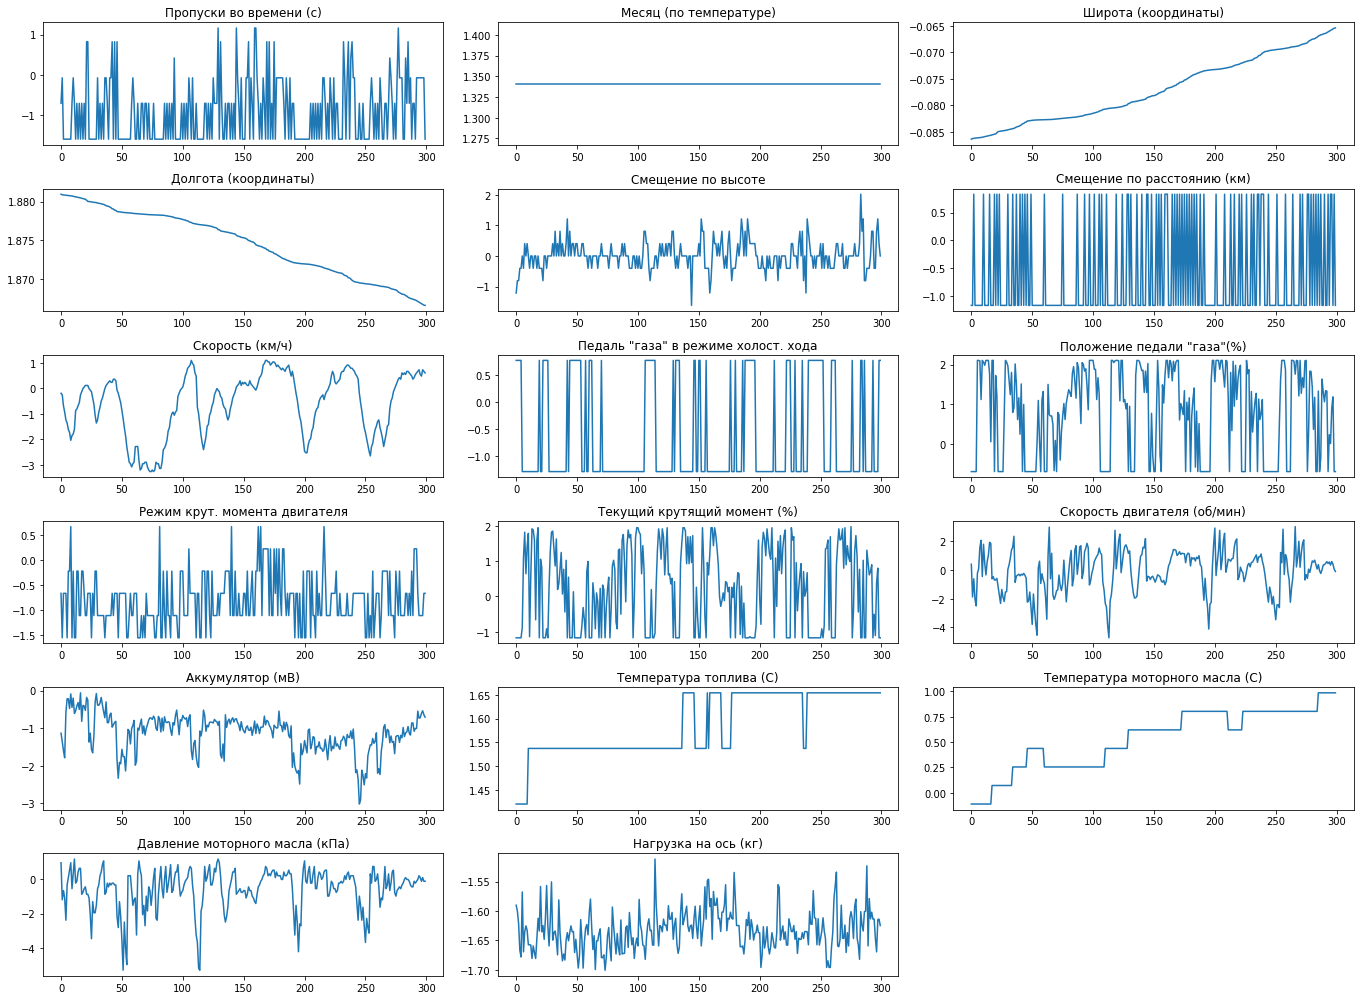

In [65]:
plt.figure(figsize=(19,14))
plot_number = 1
for i, columns in enumerate(feature_names[:-1]):
    ax = plt.subplot(6, 3, plot_number)
    plt.plot(range(0, len(test_samples[0][0][:,i])), test_samples[0][0][:,i], '')
    plt.ticklabel_format(useOffset=False, style='plain')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

\
Гистограммы сэмпла

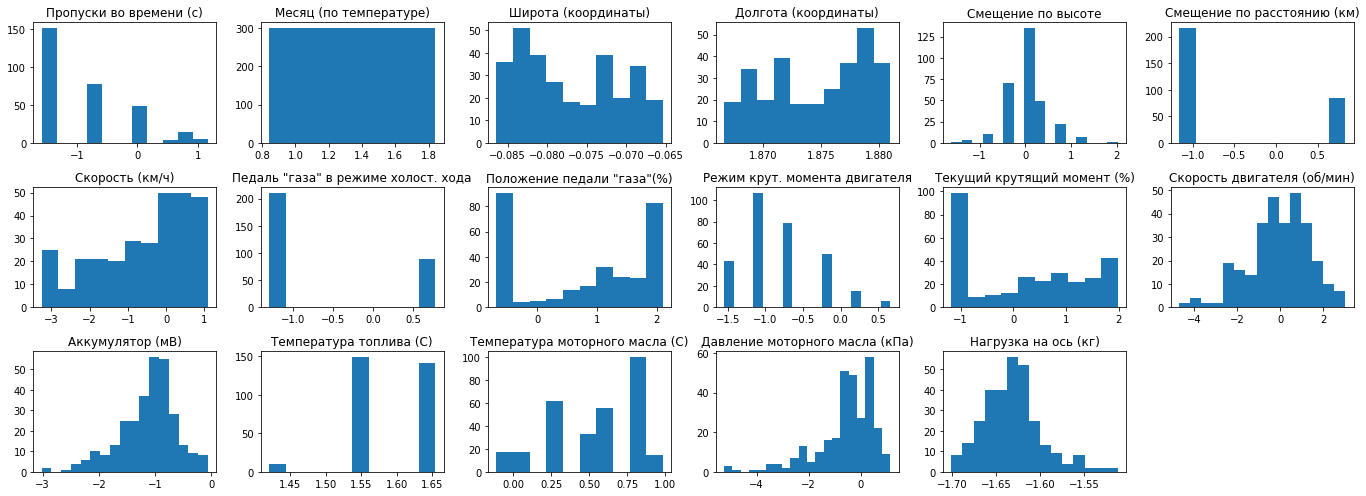

In [66]:
plt.figure(figsize=(19,7))
plot_number = 1
for i, columns in enumerate(feature_names[:-1]):
    ax = plt.subplot(3, 6, plot_number)
    plt.hist(test_samples[0][0][:,i],bins = 'auto')
    ax.set_title(columns)
    plot_number = plot_number + 1
plt.tight_layout()

## Обучение модели

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from tensorflow.compat.v1.keras.backend import get_session
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()

\
Добавим функцию для расчета коэффициента детерминации - R2. Данная метрика отсутствует в keras.

In [68]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

\
Создадим и обучим сеть на базе LSTM (Long short-term memory), которая отлично подходят для анализа временных рядов и в ходе экспериментов показала самый высокий результат. Сеть будем тренировать на 800 эпохах. Окна в батч выбираются случайно из сформированных ранее массивов индексов строк. Для оценки ошибок прогнозирования будем использовать среднюю абсолютную ошибку в процентах - MAPE, а также добавим дополнительные метрики: MSE, MAE и R2.

In [70]:
model = Sequential()
model.add(layers.LSTM(3, input_shape = (None, data.shape[-1] - 1)))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=Adam(amsgrad=True), loss ='mape', metrics=['mse','mae', r2])
history = model.fit(train_gen, steps_per_epoch=300, epochs=800, validation_data=val_gen, validation_steps=300)

Epoch 1/800
300/300 [==============================] - 70s 232ms/step - batch: 149.5000 - size: 1024.0000 - loss: 58.4507 - mean_squared_error: 4.3975 - mean_absolute_error: 1.7257 - r2: -3.3906 - val_loss: 28.2725 - val_mean_squared_error: 1.0391 - val_mean_absolute_error: 0.8187 - val_r2: -0.0659
Epoch 2/800
300/300 [==============================] - 69s 231ms/step - batch: 149.5000 - size: 1024.0000 - loss: 22.7786 - mean_squared_error: 0.6576 - mean_absolute_error: 0.6296 - r2: 0.3442 - val_loss: 19.3487 - val_mean_squared_error: 0.4342 - val_mean_absolute_error: 0.5129 - val_r2: 0.5529
Epoch 3/800
300/300 [==============================] - 70s 235ms/step - batch: 149.5000 - size: 1024.0000 - loss: 18.1256 - mean_squared_error: 0.4047 - mean_absolute_error: 0.4855 - r2: 0.5973 - val_loss: 16.3331 - val_mean_squared_error: 0.3041 - val_mean_absolute_error: 0.4235 - val_r2: 0.6880
Epoch 4/800
300/300 [==============================] - 70s 233ms/step - batch: 149.5000 - size: 1024.000

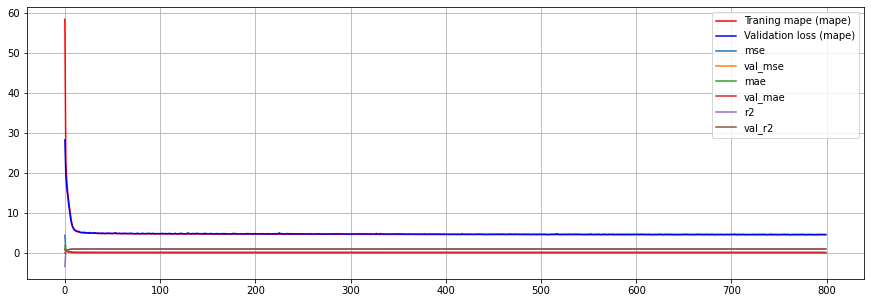

In [71]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0, len(loss))
plt.figure(figsize=(15,5))
plt.plot(epochs, loss, 'r', label= 'Traning mape (mape)')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss (mape)')
plt.plot(epochs, history.history['mean_squared_error'], label= 'mse')
plt.plot(epochs, history.history['val_mean_squared_error'], label= 'val_mse')
plt.plot(epochs, history.history['mean_absolute_error'], label= 'mae')
plt.plot(epochs, history.history['val_mean_absolute_error'], label= 'val_mae')
plt.plot(epochs, history.history['r2'], label= 'r2')
plt.plot(epochs, history.history['val_r2'], label= 'val_r2')
plt.legend()
plt.grid()
plt.show()

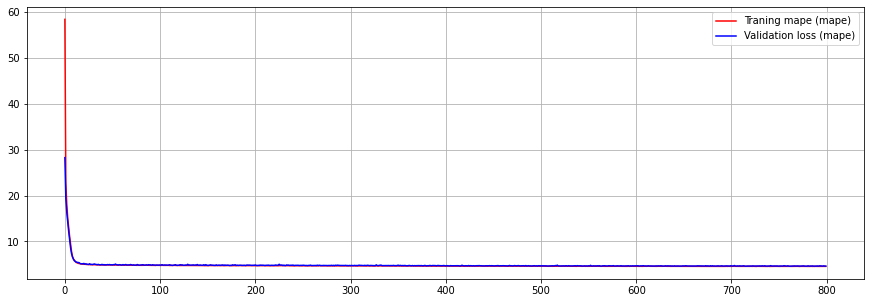

In [72]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0, len(loss))
plt.figure(figsize=(15,5))
plt.plot(epochs, loss, 'r', label= 'Traning mape (mape)')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss (mape)')
plt.legend()
plt.grid()
plt.show()

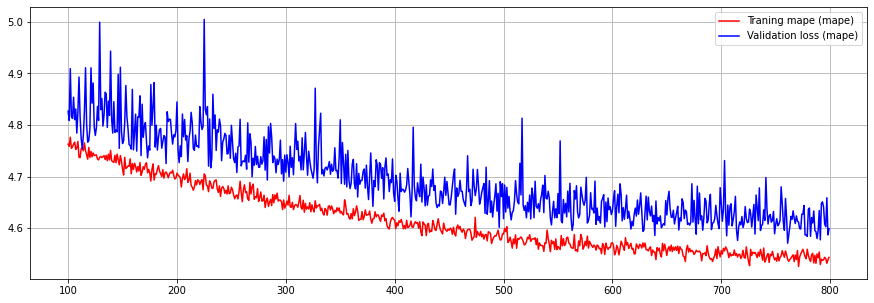

In [74]:
loss = history.history['loss'][100:]
val_loss = history.history['val_loss'][100:]
epochs = range(100, len(loss)+100)
plt.figure(figsize=(15,5))
plt.plot(epochs, loss, 'r', label= 'Traning mape (mape)')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss (mape)')
plt.legend()
plt.grid()
plt.show()

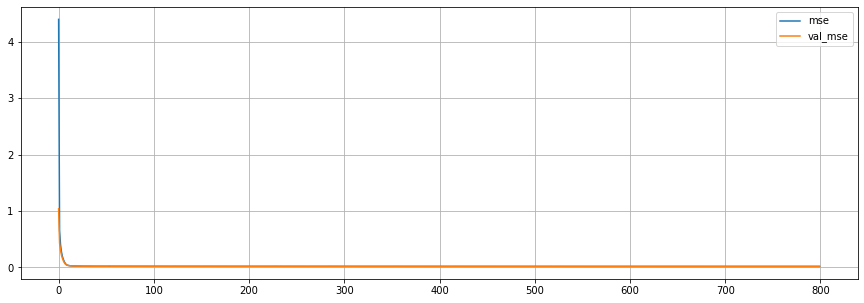

In [115]:
epochs = range(0, len(history.history['mean_squared_error']))
plt.figure(figsize=(15,5))
plt.plot(epochs, history.history['mean_squared_error'], label= 'mse')
plt.plot(epochs, history.history['val_mean_squared_error'], label= 'val_mse')
plt.legend()
plt.grid()
plt.show()

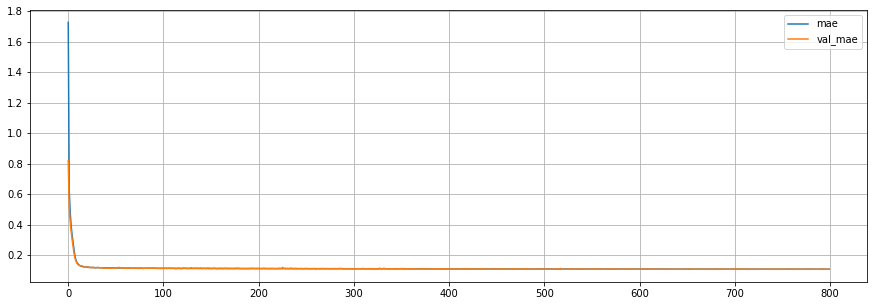

In [114]:
epochs = range(0, len(history.history['mean_absolute_error']))
plt.figure(figsize=(15,5))
plt.plot(epochs, history.history['mean_absolute_error'], label= 'mae')
plt.plot(epochs, history.history['val_mean_absolute_error'], label= 'val_mae')
plt.legend()
plt.grid()
plt.show()

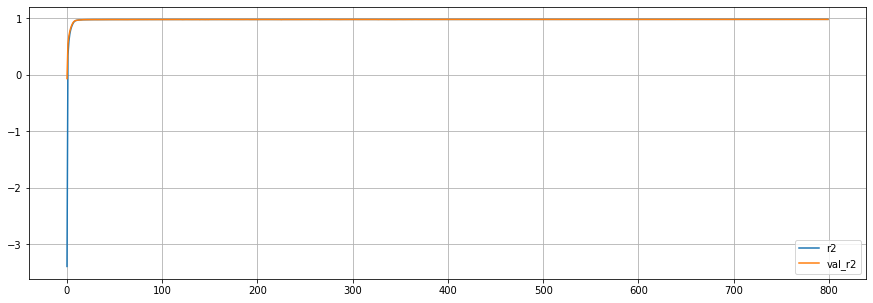

In [112]:
epochs = range(0, len(history.history['r2']))
plt.figure(figsize=(15,5))
plt.plot(epochs, history.history['r2'], label= 'r2')
plt.plot(epochs, history.history['val_r2'], label= 'val_r2')
plt.legend()
plt.grid()
plt.show()

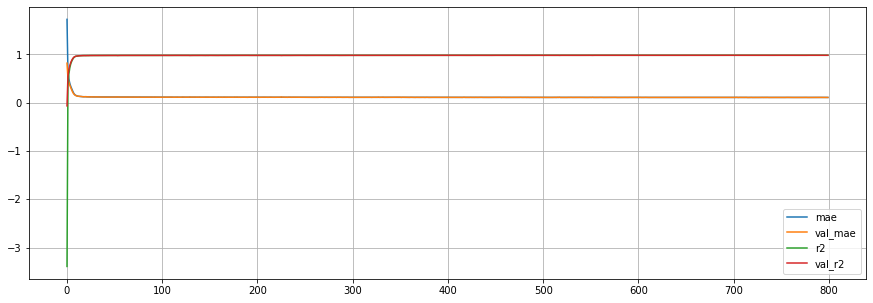

In [113]:
epochs = range(0, len(history.history['mean_absolute_error']))
plt.figure(figsize=(15,5))
plt.plot(epochs, history.history['mean_absolute_error'], label= 'mae')
plt.plot(epochs, history.history['val_mean_absolute_error'], label= 'val_mae')
plt.plot(epochs, history.history['r2'], label= 'r2')
plt.plot(epochs, history.history['val_r2'], label= 'val_r2')
plt.legend()
plt.grid()
plt.show()

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 3)                 252       
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 268
Trainable params: 268
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.save('/home/sam/data_science/lstm3_d3_d1_w300.h5')

In [ ]:
dependencies = {'r2': r2}
from keras.models import load_model
model = load_model('/home/sam/data_science/lstm3_d3_d1_w300.h5', custom_objects=dependencies) 

### 
### Оценка предсказаний модели

Модель продемонстировала отличные результаты предсказания расхода топлива, итоговая ошибка (MAPE) составила менее 5%

\
Метрики: MAPE, MSE, MAE, R2

По обучаюшей выборке:

In [80]:
model.evaluate(train_gen, steps = 15000)

[4.5451727186203, 0.018410781, 0.1091214, 0.9816608]

\
По проверочной выборке:

In [81]:
model.evaluate(val_gen, steps = 15000)

[4.5931944646199545, 0.01804446, 0.10799948, 0.9814442]

\
По всему датасету:

In [82]:
model.evaluate(all_gen, steps = 15000)

[4.551511556561788, 0.018319536, 0.10883968, 0.9816405]

\
Проведем анализ предсказаний модели с реальными значениями на случайном батче из всей выборки

In [134]:
test_samples = next(all_gen)
test_predict = model.predict(test_samples[0])

In [135]:
pd.DataFrame(test_samples[1].reshape(-1,1),columns=['real']).assign(predict=test_predict)

,real,predict
0,3.19,3.14
1,4.04,4.07
2,2.34,2.43
3,4.89,4.99
4,2.12,2.12
...,...,...
1019,3.82,3.68
1020,1.91,1.73
1021,1.06,1.24
1022,3.82,3.81


In [136]:
pd.DataFrame(test_samples[1].reshape(-1,1),columns=['real']).assign(predict=test_predict).describe()

,real,predict
count,"1,024.00","1,024.00"
mean,2.78,2.77
std,1.00,0.99
min,0.85,0.77
25%,1.91,1.92
50%,2.55,2.61
75%,3.61,3.56
max,5.74,5.55


## Анализ модели

Перейдем к интерпретации предсказаний модели. Воспользуемся для этого библиотекой SHAP.

Сначала возьмем уже готовые массивы индексов с непересекающимися окнами для тренировочной и проверочной выборок

In [87]:
correct_idx_train_disjoint

0           299
1           733
2          1070
3          1371
4          1786
         ...   
5711    2452429
5712    2452730
5713    2453030
5714    2453430
5715    2453730
Length: 5716, dtype: int64

In [88]:
correct_idx_val_disjoint

0        259431
1        259731
2        260033
3        260503
4        260803
         ...   
1424    2495944
1425    2496244
1426    2496544
1427    2496844
1428    2497144
Length: 1429, dtype: int64

\
Теперь с их помощью извлечем фоновые данные из непересекающихся окон

In [89]:
train_samples = next(generator(data, wind_width, correct_idx_train_disjoint.to_numpy(np.int64), batch_size = len(correct_idx_train_disjoint)-1, shuffle = False))
val_samples = next(generator(data, wind_width, correct_idx_val_disjoint.to_numpy(np.int64), batch_size = len(correct_idx_val_disjoint)-1, shuffle = False))

Расчитаем shap values

In [96]:
import shap
explainer = shap.DeepExplainer(model, train_samples[0])
shap_values = explainer.shap_values(val_samples[0])

### 
### Оценим важность признаков для модели:

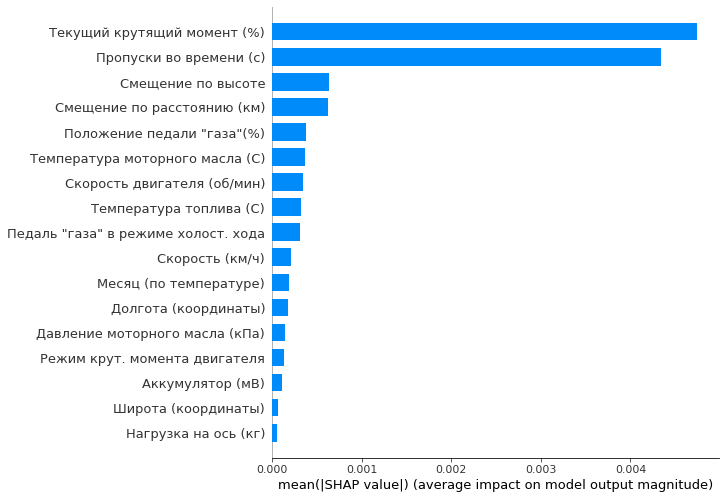

In [91]:
shap.summary_plot(shap_values[0].reshape(-1, data.shape[-1] - 1), feature_names=feature_names, plot_type = "bar")

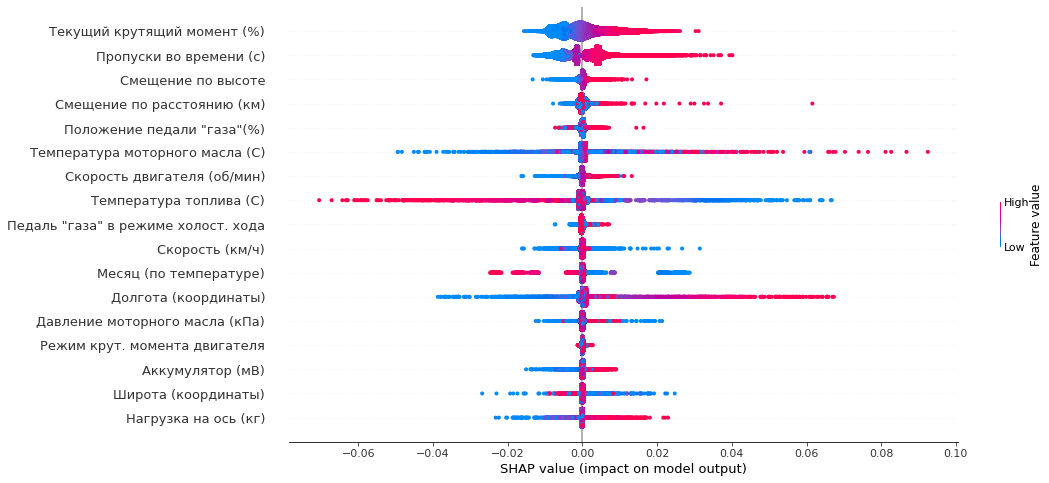

In [92]:
shap.summary_plot(shap_values[0].reshape(-1, data.shape[-1] - 1), features=val_samples[0].reshape(-1, data.shape[-1] - 1), feature_names=feature_names[:-1],plot_size=(15,8))

\
Описание графика SHAP:

- Значение слева от центральной вертикальной линии оказывает понижение расхода топлива, а справа его повышение

- Чем толще линия на графике, тем больше таких точек наблюдения

- Чем краснее точки на графике, тем выше значения признака в ней

#### 
#### Рассмотрим конкретные признаки подробнее:

- Самым важным показателем является текущий крутящий момент двигателя, с ростом которого повышается расход топлива

- "Пропуски во времени" отражают в данном случае отсутствующие строки с данными и чем дольше это отсутствие тем больше вероятный расход топлива за этот период

- "Смещение по высоте" показывает движение автомобиля в гору или спуск с нее, естественным образом при спуске потребление топлива сокращается

- "Смещение по расстоянию" показывает пройденное расстояние за время отсутствия данных и, конечно, при его увеличении вырастает и расход

- При росте оборотов двигателя увеличивается расход топлива

- Низкая температура топлива говорит о низкой температуре окружающей среды, что повышает его расход

- Аналогичным образом заметно что в более холодные месяцы расход также заметно выше

- Нагрузка на ось автомобиля очевидным образом связана с весом перевозимого груза и конечно влияет на потребление топлива